# **Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign**

## **Problem Statement**

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

##**1.0 Initializing the Project**

*In this section we'll set up the python coding environment in Google Colab, load the dataset and then create a copy of it for transformation.*

### **1.1 Importing necessary libraries**

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Loading data science libraries

import pandas as pd
import numpy as np

# Loading libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading library for splitting the data
from sklearn.model_selection import train_test_split

# Removing the number of displayed columns limit in Python
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    #plot_confusion_matrix, #Not necessary in google.colab
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
'''
Function that formats a print function to recognize
numbers and display them in bold, with blue font.
The function can convert numbers into dollars with the
'in_thousands' argument
'''
def fmt(*args, decimals=4, in_thousands=False):
    for i, arg in enumerate(args):
        next_arg = args[i + 1] if i + 1 < len(args) else None

        if isinstance(arg, (int, float, np.number)):
            # If in_thousands is True, convert the number to thousands and format as an integer
            if in_thousands:
                arg = int(arg * 1000)  # Convert to thousands and ensure it's an integer

            # Format as a comma-separated string if it's an integer type
            if isinstance(arg, (int, np.integer)):
                formatted_arg = f'{arg:,}'  # Removed the dollar sign for non-currency representation
                if in_thousands:
                    formatted_arg = f'${formatted_arg}'  # Add the dollar sign if in_thousands is True
            else:  # For floating-point types
                formatted_arg = f'{arg:.{decimals}f}'  # Removed the dollar sign for non-currency representation
                if in_thousands:
                    formatted_arg = f'${formatted_arg}'  # Add the dollar sign if in_thousands is True

            print(f'\033[1m\033[94m{formatted_arg}\033[0m', end='' if isinstance(next_arg, str) else ' ')
        else:
            print(arg, end='' if isinstance(next_arg, (int, float, np.number)) else ' ')

    print()

### **1.2 Loading the dataset**

In [ ]:
# Mount the drive (Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/Data/machine_learning/Loan_Modelling.csv')
df = data.copy()

## **2.0 Data Overview**

*In this section, we'll gather some basic information about the dataset we just loaded. We want to be able to assess the size/shape of the data, the datatypes each column is assigned, etc.*

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


* At first glance, there are no issues with missing values.

In [ ]:
# Get the shape of the dataset (number of rows and columns)
fmt('There are ', df.shape[0], ' rows and ', df.shape[1], ' columns in the dataset')


There are 5,000 rows and 14 columns in the dataset 


In [ ]:
# Get basic information about data structures
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Get summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


###**Summary Observations:**

* There are 14 columns of data
* (13) columns are *int* data type
* (1) column is *float* data type
* We know that there are 5,000 rows of data. Thus there are no "null" values in any of the columns (we will still need to check that our values are valid)
* The **ID** column is a non-repeatable index of the rows and can be dropped from the dataset

In [ ]:
# Dropping the 'ID' column from the data set
df = df.drop(['ID'], axis=1)

## **3.0 Data Preprocessing (Part I)**

####*In this section, we will process the data and prepare it for ingest into the Machine Learning Model.*

* *Missing value treatment*
* *Feature Updates (if needed)*
* *Outlier detection and treatment (if needed)*
* *Preparing data for modeling*
* *Any other preprocessing steps (if needed)*

###**3.1 Check for Missing Values**

In [ ]:
# Verifying there are no null values
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
unique_sorted_ages = np.unique(df['Age'])
fmt('Age:', '\n',unique_sorted_ages)
unique_sorted_experience = np.unique(df['Experience'])
fmt('\n\nExperience:', '\n',unique_sorted_experience)
unique_sorted_income = np.unique(df['Income'])
fmt('\n\nIncome:', '\n',unique_sorted_income)
unique_sorted_zip = np.unique(df['ZIPCode'])
fmt('\n\nZIPCode:', '\n',unique_sorted_zip)
unique_sorted_family = np.unique(df['Family'])
fmt('\n\nFamily:', '\n',unique_sorted_family)
unique_sorted_ccavg = np.unique(df['CCAvg'])
fmt('\n\nCCAvg:', '\n',unique_sorted_ccavg)
unique_sorted_education = np.unique(df['Education'])
fmt('\n\nEducation:', '\n',unique_sorted_education)



Age: 
 [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67] 


Experience: 
 [-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43] 


Income: 
 [  8   9  10  11  12  13  14  15  18  19  20  21  22  23  24  25  28  29
  30  31  32  33  34  35  38  39  40  41  42  43  44  45  48  49  50  51
  52  53  54  55  58  59  60  61  62  63  64  65  68  69  70  71  72  73
  74  75  78  79  80  81  82  83  84  85  88  89  90  91  92  93  94  95
  98  99 100 101 102 103 104 105 108 109 110 111 112 113 114 115 118 119
 120 121 122 123 124 125 128 129 130 131 132 133 134 135 138 139 140 141
 142 143 144 145 148 149 150 151 152 153 154 155 158 159 160 161 162 163
 164 165 168 169 170 171 172 173 174 175 178 179 180 181 182 183 184 185
 188 189 190 191 192 193 194 195 198 199 200 201 202 203 204 205 218 224] 


ZIPCode: 
 [90005 90

#### **Summary Observations:**
* There are no missing values
* Except for one column, the values present in the data set seem appropriate
* The 'Experience' column contains some negative years of experience. Will assume these are positive values

###**3.2 Feature Updates**

In [ ]:
# Ensure all column values in 'Experience' are positive values
df['Experience'] = df['Experience'].abs()

In [ ]:
# Mapping the 'Education' column values to 1: Undergrad; 2: Graduate 3: Advanced/Professional
df["Education"].replace(1, "Undergraduate", inplace=True)
df["Education"].replace(2, "Graduate", inplace=True)
df["Education"].replace(3, "Professional", inplace=True)

In [ ]:
# Consolidate zip codes into a smaller number of categories
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(
    "Number of unique categories for ZIPCode: ",
    df["ZIPCode"].str[0:2].nunique(),
)
df["ZIPCode"] = df["ZIPCode"].str[0:2]

df["ZIPCode"] = df["ZIPCode"].astype("category")

Number of unique categories for ZIPCode:  7


In [ ]:
# Convert necessary columns to 'category' data type
cat_columns = ['Education',
               'Personal_Loan',
               'Securities_Account',
               'CD_Account',
               'Online',
               'CreditCard',
               'ZIPCode'
]
df[cat_columns] = df[cat_columns].astype('category')

In [ ]:
# Checking updated data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


####**Summary Observations:**
* Some columns have been converted to category data types
* All data is ready for ingest into a supervised machine learning model
* Will plan to conduct EDA to understand data further before contemplating additional transformations


##**4.0 Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
  * The Mortgage attribute is highly right-skewed. This is because the attribute includes counts of $0 (where the entity has no mortgage at all). This also encourages the data to have many outliers.
2. How many customers have credit cards?
  * 1,470 customers have credit cards
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  * Credit Card Average and income are positively correlated to the Personal_Loan attribute
4. How does a customer's interest in purchasing a loan vary with their age?
  * Age does not seem to be much of a factor among customers who are considering loans. The median and distribution plots look very similar.
5. How does a customer's interest in purchasing a loan vary with their education?
  * Customers who have a bachelor's degree are less likely than those with professional or graduate edcation levels.

####**4.1 New Functions for Visualizations**

In [ ]:
# Function to create a combined histogram and boxplot
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None, hist_label=None, xlabel=None, ylabel=None):
    '''
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    hist_label: label for the histogram (default None)
    xlabel: label for the x-axis (default None)
    ylabel: label for the y-axis of the histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, label=hist_label, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, label=hist_label)

    if hist_label:
        ax_hist2.legend()

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

    if xlabel:
        ax_hist2.set_xlabel(xlabel)

    if ylabel:
        ax_hist2.set_ylabel(ylabel)

    plt.show()

In [ ]:
# Function to create a labeled barplot
def labeled_barplot(data, feature, perc=False, n=None, rotation=90, xlabel=None, ylabel=None, title=None, order_by_counts=False):
    '''
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    rotation: rotation of x-axis labels (default is 90)
    xlabel: label for the x-axis (default is None)
    ylabel: label for the y-axis (default is None)
    title: title of the plot (default is None)
    order_by_counts: whether to order the bars by counts (default is True)
    '''

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    order = data[feature].value_counts().index[:n] if order_by_counts else sorted(data[feature].unique())
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=order)

    if xlabel:
        ax.set_xlabel(xlabel)

    if ylabel:
        ax.set_ylabel(ylabel)

    if title:
        ax.set_title(title)

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(label, (x, y), ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

    plt.xticks(rotation=rotation, fontsize=15)
    plt.show()


In [ ]:
def stacked_barplot(data, predictor, target, colors='tab10', title="Stacked Barplot", xlabel="X-axis", ylabel="Y-axis", x_order=None, rotate_xlabel=0):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    colors: colors or colormap to use for the bars
    title: title of the plot
    xlabel: label for the x-axis
    ylabel: label for the y-axis
    x_order: list, order of the categories on the x-axis
    x_ticks_rotation: int, rotation angle of the x-axis labels
    """
    global tab1  # Declare tab1 as a global variable

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)

    print(tab1)
    print("-" * 120)

    if x_order:  # If x_order is provided, reorder the DataFrame before plotting
        tab1 = tab1.loc[x_order + ['All']]

    # Drop the 'All' row and 'All' column from tab1 before plotting
    tab = tab1.drop('All').drop('All', axis=1)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5), colormap=colors)

    plt.title(title)  # Set the title of the plot
    plt.xlabel(xlabel)  # Set the label for the x-axis
    plt.ylabel(ylabel)  # Set the label for the y-axis
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=rotate_xlabel)  # Set the rotation angle of the x-axis labels
    plt.show()


In [ ]:
# Function to create distribution plot
def distribution_plot_wrt_target(data, predictor, target, titles=None, xlabels=None, ylabels=None):
    '''
    Plot distributions with respect to target

    data: dataframe
    predictor: independent variable
    target: target variable
    titles: list containing titles for the subplots, in the order: [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]
    xlabels: list containing x-labels for the subplots, in the same order
    ylabels: list containing y-labels for the subplots, in the same order
    '''

    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    target_uniq = data[target].unique()

    if titles is None:
        titles = [""] * 4  # Default titles (empty strings)
    if xlabels is None:
        xlabels = [""] * 4  # Default x-labels (empty strings)
    if ylabels is None:
        ylabels = [""] * 4  # Default y-labels (empty strings)

    axs[0, 0].set_title(titles[0] or "Distribution of target for target=" + str(target_uniq[0]))
    axs[0, 0].set_xlabel(xlabels[0])
    axs[0, 0].set_ylabel(ylabels[0])
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title(titles[1] or "Distribution of target for target=" + str(target_uniq[1]))
    axs[0, 1].set_xlabel(xlabels[1])
    axs[0, 1].set_ylabel(ylabels[1])
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title(titles[2] or "Boxplot w.r.t target")
    axs[1, 0].set_xlabel(xlabels[2])
    axs[1, 0].set_ylabel(ylabels[2])
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title(titles[3] or "Boxplot (without outliers) w.r.t target")
    axs[1, 1].set_xlabel(xlabels[3])
    axs[1, 1].set_ylabel(ylabels[3])
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###**4.2 Univariate Analysis**

*In this section we perform analysis on each isolated variable*

####**Observations on Age**

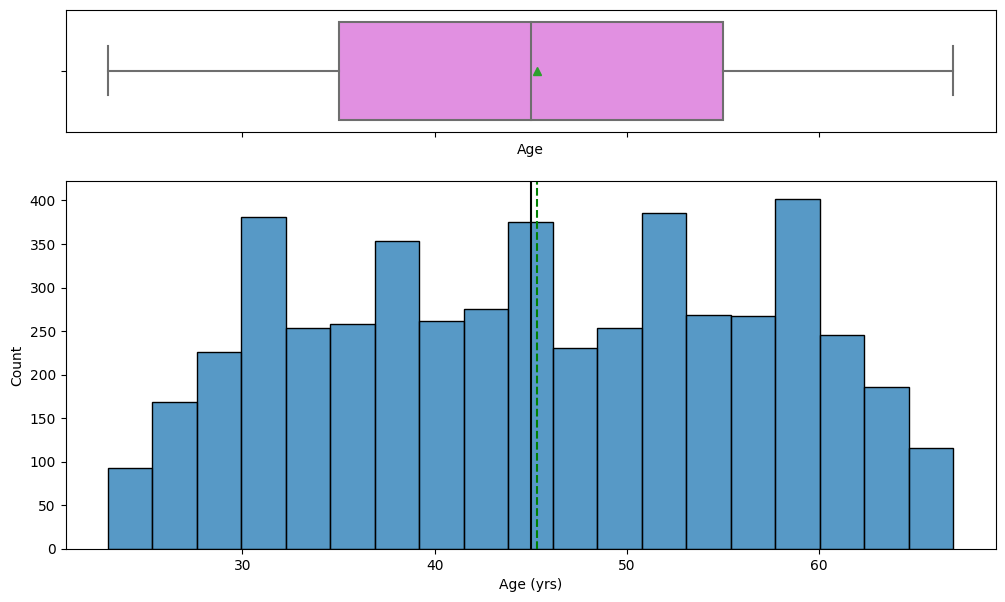

The median age is: 45 yrs 
The youngest customer(s) are: 23 yrs 
The oldest customer(s) are: 67 yrs 
The mean age is: 45.34 yrs 


In [ ]:
histogram_boxplot(df, "Age", xlabel='Age (yrs)')
plt.show()
fmt('The median age is: ', df['Age'].median(), ' yrs', decimals=0)
fmt('The youngest customer(s) are: ', df['Age'].min(), ' yrs', decimals=0)
fmt('The oldest customer(s) are: ', df['Age'].max(), ' yrs', decimals=3)
fmt('The mean age is: ', df['Age'].mean(), ' yrs', decimals=2)

Observed:

* This is an **int** data type
* There is no observed skewness to the data
* The median age of customers is 45 years; the mean is ~45/34 years.
* Overall Age:
  * Youngest Customer(s): 23 years
  * Oldest Customer(s): 67 years

####**Observations on Experience**

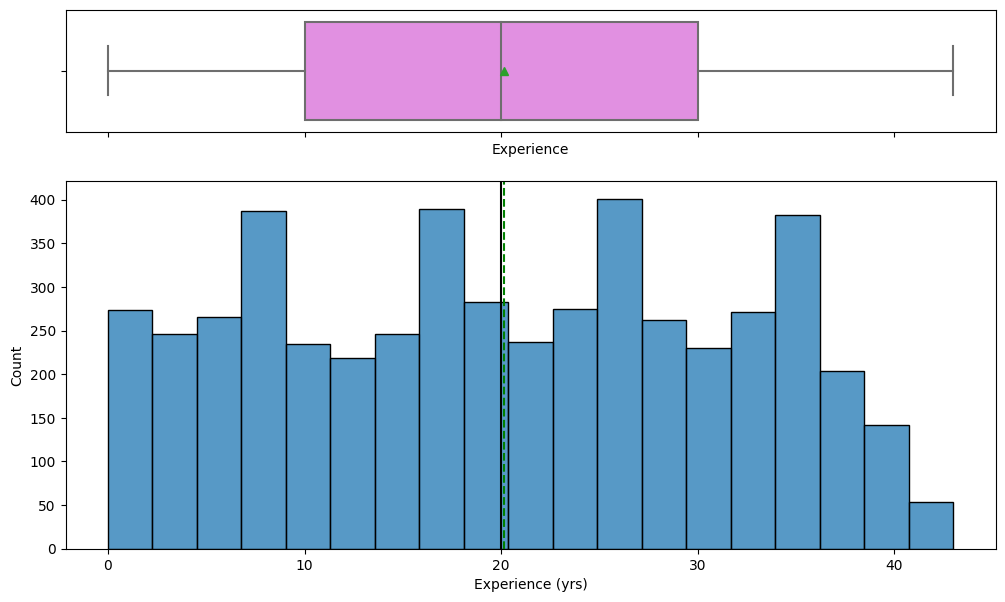

The median experience is: 20 yrs 
The least experienced customer(s) have: 0 yrs 
The most experienced customer(s) have: 43 yrs 
The mean for experience is: 20.13 yrs 


In [ ]:
histogram_boxplot(df, 'Experience', xlabel='Experience (yrs)')
plt.show()
fmt('The median experience is: ', df['Experience'].median(), ' yrs', decimals=0)
fmt('The least experienced customer(s) have: ', df['Experience'].min(), ' yrs', decimals=0)
fmt('The most experienced customer(s) have: ', df['Experience'].max(), ' yrs', decimals=3)
fmt('The mean for experience is: ', df['Experience'].mean(), ' yrs', decimals=2)

Observed:

* This is an **int** data type
* Customers range from 0 years to 43 years of professional experience
* The mean amount of experience is ~20.13 years
* The median amount of experience is 20 years
* There is very little skewness to the data


####**Observations on Income**

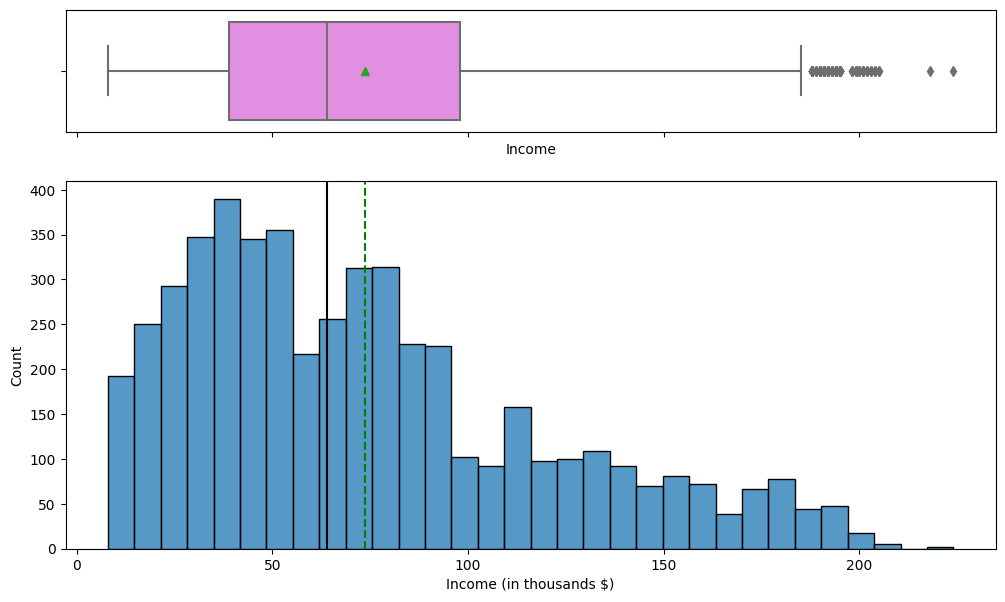

The median income is $64,000 
The lowest income is: $8,000 
The highest income is: $224,000 
The mean income is: $73,774 


In [ ]:
histogram_boxplot(df, 'Income', xlabel='Income (in thousands $)')
plt.show()
fmt('The median income is ', df['Income'].median(), decimals=0, in_thousands=True)
fmt('The lowest income is: ', df['Income'].min(), decimals=0, in_thousands=True)
fmt('The highest income is: ', df['Income'].max(), decimals=0, in_thousands=True)
fmt('The mean income is: ', df['Income'].mean(), decimals=2, in_thousands=True)

Observed:

* This is an **int** data type
* Income is right-skewed with outliers present beyond the 4th quartile
* The highest income is \$224,000
* The lowest Income is \$8,000
* The meadian income is \$64,000
* Outliers and skewness pull the median income to the right: \$73,774

####**Observations on Family**

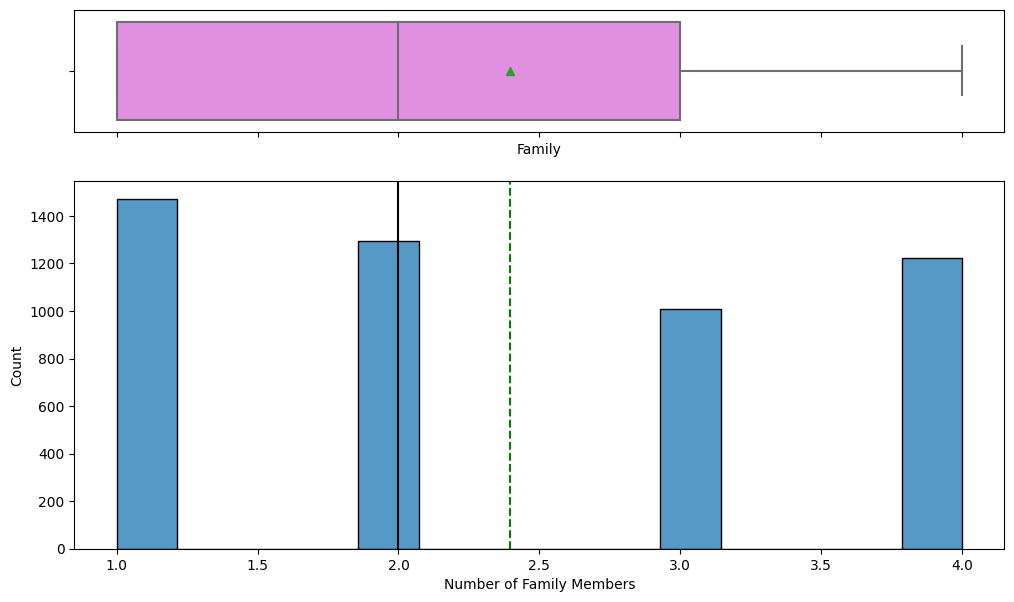

Most customers have a family size of: 1 
Families range in size from 1 to 4 people 


In [ ]:
histogram_boxplot(df, 'Family', xlabel=('Number of Family Members'))
plt.show()
fmt('Most customers have a family size of: ', df['Family'].mode().iloc[0], decimals=0)
fmt('Families range in size from ', df['Family'].min(), ' to ', df['Family'].max(), ' people')

Observed:

* This is an **int** data type
* Although most customers live alone, family sizes of 2, 3 or 4 are common throughout the data.
* a customer is least likely to have a family of 3

####**Observations on CCAvg**

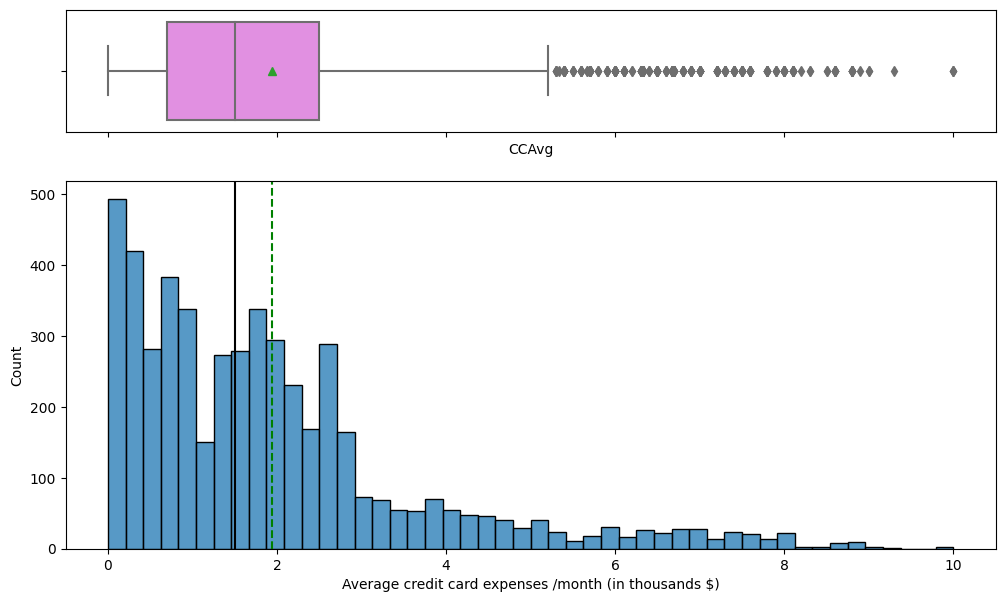

Customers spend and average of $1,937 per month on credit cards 
Customers spend between $0 and $10,000 per month 
Half of the bank's customers spend <= $1,500 per month 


In [ ]:
histogram_boxplot(df, 'CCAvg', xlabel='Average credit card expenses /month (in thousands $)')
plt.show()
fmt('Customers spend and average of ', df['CCAvg'].mean(), ' per month on credit cards', in_thousands=True)
fmt('Customers spend between ', df['CCAvg'].min(), ' and ', df['CCAvg'].max(), ' per month', in_thousands=True)
fmt('Half of the bank\'s customers spend <= ', df['CCAvg'].median(), ' per month', in_thousands=True)

Observed:
* This is a **float** data type
* There are outliers beyond the data's 4th Quartile
* Half of the bank's customers spend less than \$2,000 on credit cards
* The other half tends to spend as much as ~\$5,000
* There are outliers in the data who spend as much as \$10,000 per month

####**Observations on Mortgage**

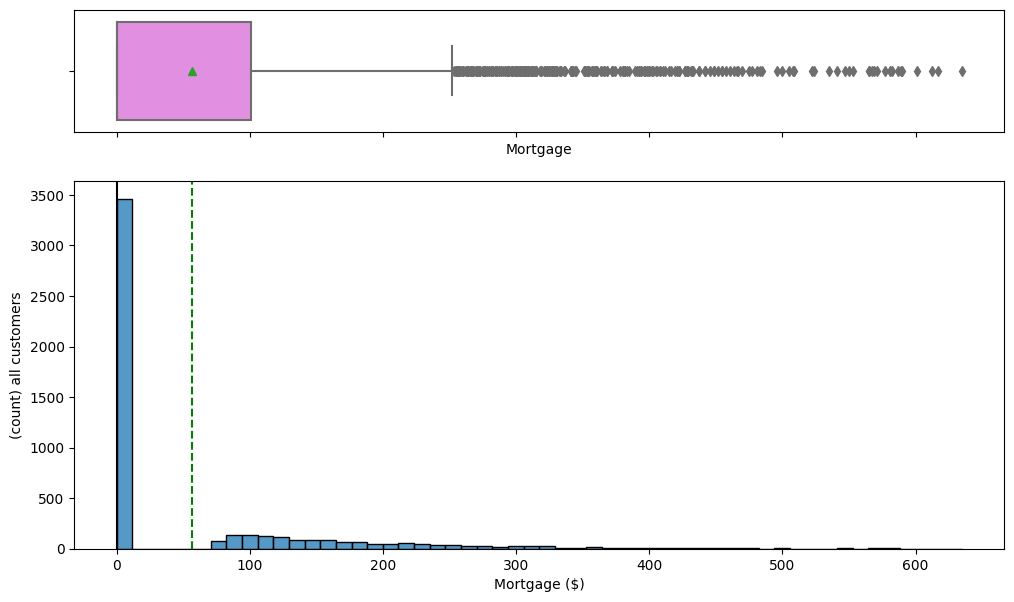

-------------------------------------------------------------------------------------------------------------------------------------------------


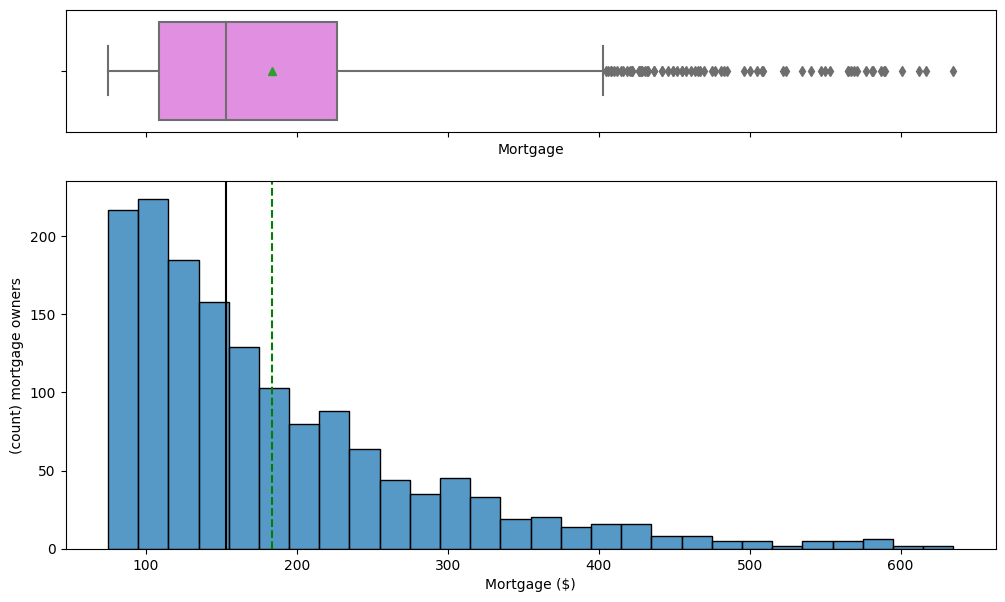


Out of 5,000 customers, 1,538 have a mortgage. This represents 30.76 % of customers 
The cheapest customer mortgage is $75,000 
The average mortgage price of a customer's home is $183,676 
The most expensive customer mortgage is $635,000 
Half of the customer have mortgages <= 153.0000 


In [ ]:
histogram_boxplot(df, 'Mortgage', xlabel='Mortgage ($)', ylabel='(count) all customers')
plt.show()
print('-------------------------------------------------------------------------------------------------------------------------------------------------')
df_mortgage = df[df['Mortgage'] != 0]   # Filter out the '0' values for customers who do not have a mortgage
histogram_boxplot(df_mortgage, 'Mortgage', ylabel='(count) mortgage owners', xlabel="Mortgage ($)")
plt.show()
print('')

# Print metrics from data
mortgage_customers = df.shape[0] - sum(df['Mortgage'] == 0) # Calculating total number of customers with a mortgage
fmt('Out of ', df.shape[0], ' customers, ', mortgage_customers, ' have a mortgage. This represents ',
 (mortgage_customers/df.shape[0])*100, ' % of customers', decimals=2 )
fmt('The cheapest customer mortgage is ', np.unique(df['Mortgage'])[1], in_thousands=True)

# Print metrics from data
fmt('The average mortgage price of a customer\'s home is ', df_mortgage['Mortgage'].mean(), in_thousands=True)
fmt('The most expensive customer mortgage is ', df_mortgage['Mortgage'].max(), in_thousands=True)
fmt('Half of the customer have mortgages <= ', df_mortgage['Mortgage'].median())

Observed:
* This is an **Int** data type
* There are many outliers in the data
* The presence of \$0 value mortgages in the dataset aren't accurate. These clients *don't have* mortgages
* The data is right-skewed
* The average mortgage value is \$183,676
* Outliers begin to surface around \$400,000

In [ ]:
# Temporarily converting category columns to int for metrics calculaitons
int_columns = ['Personal_Loan',
               'Securities_Account',
               'CD_Account',
               'Online',
               'CreditCard',
               'ZIPCode']
df_conversion = df.copy()
df_conversion[int_columns] = df_conversion[int_columns].astype(int)
df_conversion.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIPCode                  int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan            int64
Securities_Account       int64
CD_Account               int64
Online                   int64
CreditCard               int64
dtype: object

####**Observations on ZIPCode**

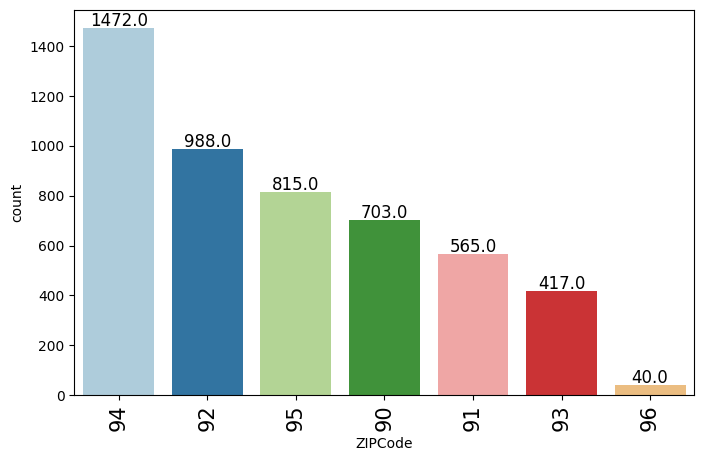

The 94 area code is the most populous among the bank's customers and represents 29.44 % of customer addresses 
There are 7 different zip code addresses among the bank's customers 


In [ ]:
labeled_barplot(df, 'ZIPCode', order_by_counts=True);
plt.show()
# Get metrics of column
mode_value = int(df['ZIPCode'].mode().iloc[0])

fmt('The ', mode_value, ' area code is the most populous among the bank\'s customers and represents ',
    float(df['ZIPCode'].value_counts(normalize=True).loc['94']*100), ' % of customer addresses', decimals=2)
fmt('There are ', df['ZIPCode'].nunique(), ' different zip code addresses among the bank\'s customers')

Observed:

* This is a **categorical** data type
* The most popular zip codes are "94xxx"
* There are 7 zip code categories

####**Observations on Education**

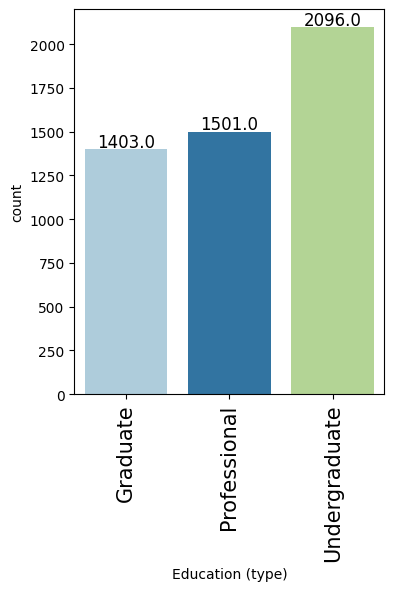

In [ ]:
labeled_barplot(df, 'Education', xlabel='Education (type)')
plt.show()

Observed:

* This is a **categorical** data type
* The most prominant category of education is 'Undergraduate'
* The combination of education appears as expected among a general population of customers

####**Observations on Personal_Loan**

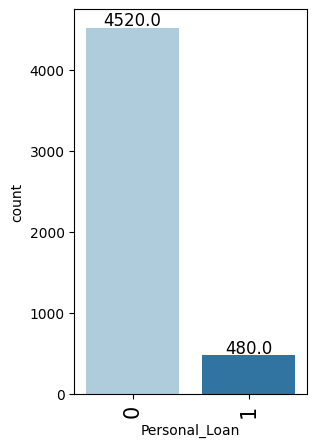


9.60 % of the bank's clients have taken out personal loans 


In [ ]:
labeled_barplot(df, 'Personal_Loan')
pl_percent = df_conversion['Personal_Loan'].value_counts(normalize=True).loc[1]*100
print('')
fmt(pl_percent, ' % of the bank\'s clients have taken out personal loans', decimals=2)


Observed:
* Only 9.6% of clients have taken out personal loans with the bank

####**Observations on Securities_account**

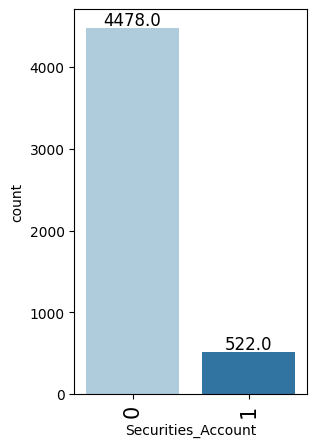


10.44 % of the bank's clients have securities accounts 


In [ ]:
labeled_barplot(df, 'Securities_Account')
sa_percent = df_conversion['Securities_Account'].value_counts(normalize=True).loc[1]*100
print('')
fmt(sa_percent, ' % of the bank\'s clients have securities accounts', decimals=2)

Observed:
* 10.44% of the banks customers have securities accounts

####**Observations on CD_Account**

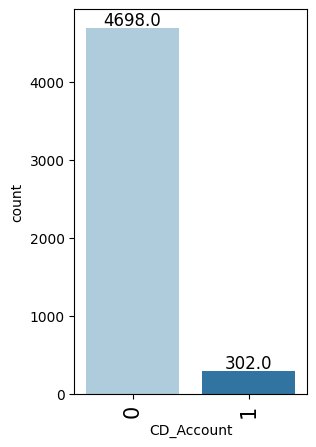


6.04 % of the bank's clients have certificate of deposit accounts 


In [ ]:
labeled_barplot(df, 'CD_Account')
cd_percent = df_conversion['CD_Account'].value_counts(normalize=True).loc[1]*100
print('')
fmt(cd_percent, ' % of the bank\'s clients have certificate of deposit accounts', decimals=2)

####**Observations on Online**

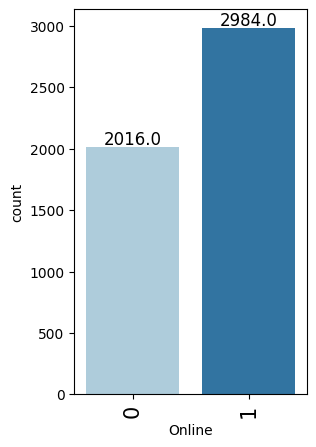


59.68 % of the bank's clients use online banking accounts 


In [ ]:
labeled_barplot(df, 'Online')
ol_percent = df_conversion['Online'].value_counts(normalize=True).loc[1]*100
print('')
fmt(ol_percent, ' % of the bank\'s clients use online banking accounts', decimals=2)

Observed:
* Most (59.68%) of the bank's client use online banking

####**Observations on Credit_Card**

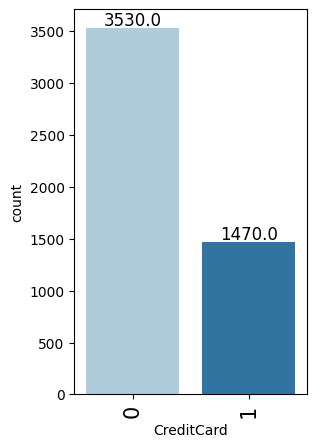


29.40 % of the bank's clients use credit cards issued by competing banks 
A total of 1,470 customers have credit cards 


In [ ]:
labeled_barplot(df, 'CreditCard')
cc_percent = df_conversion['CreditCard'].value_counts(normalize=True).loc[1]*100
cc_count = df_conversion['CreditCard'].value_counts(normalize=False).loc[1]
print('')
fmt(cc_percent, ' % of the bank\'s clients use credit cards issued by competing banks', decimals=2)
fmt('A total of ', cc_count, ' customers have credit cards')

Observed:
* About a third (29.4%) of the bank's clients have credit cards issued by other banks

###**4.3 Multivariate Analysis**

*In this section, we perform analysis on multiple variables as they are compared together.*

####**Correlations (Heatmap)**

In [ ]:
df['Personal_Loan'] = df['Personal_Loan'].astype('category')


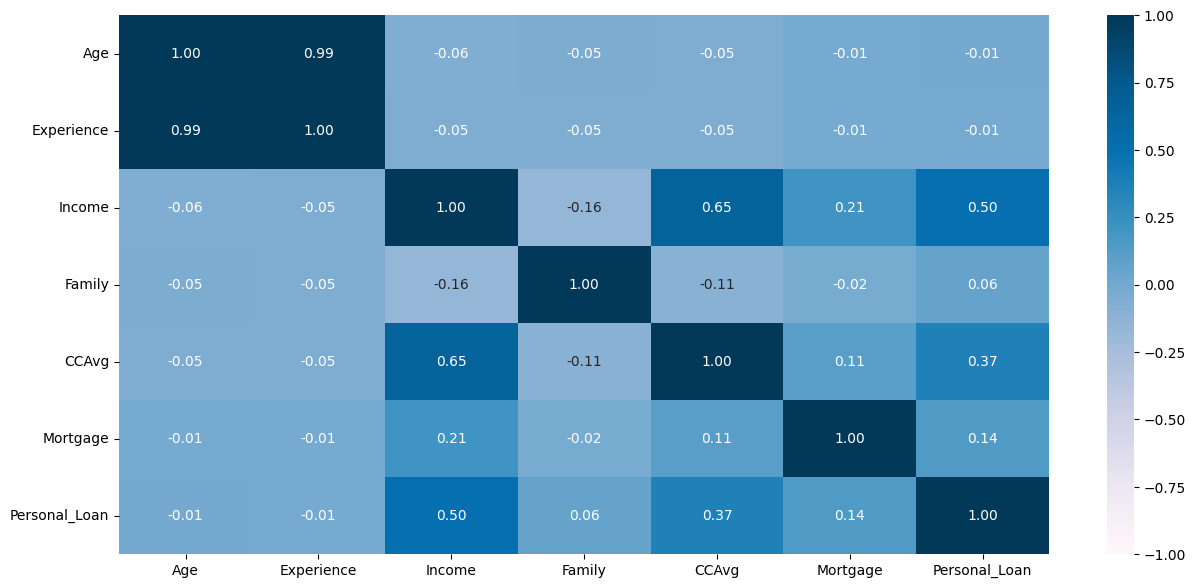

In [ ]:
# Check for corrleations among the data
'''Remember, these correlations require a
continuous value so cateorical columns will
not be present
'''
# Temporarily convert 'Personal_Loan' to an 'int64' data type.
df['Personal_Loan'] = df['Personal_Loan'].astype('int64')
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PuBu")
plt.show()

# Re-assign 'Personal_Loan' to a 'category' data type.
df['Personal_Loan'] = df['Personal_Loan'].astype('int64')

Observed:
* 'Age' and 'Experience' are ***strongly*** (positively) correlated
  * The Experience column should be dropped to avoid correlation error
* 'Income' and 'CCAvg' are ***moderately*** (positively) correlated
* 'Mortgage' and ' Income' are ***weakly*** (positively) correlated
* 'Mortgage' and 'CCAvg' are ***weakly*** (positively) correlated
* 'Family' and 'Income' are ***weakly*** (negatively) correlated
* 'Family' and 'CCAvg' are ***weakly** (negatively) correlated

*Note: Positive correlations mean that as one variable increases (+), so does the other (+). Negative correlations mean that as one variable increases (+), the other decreases (-).*

####**Personal_Loan vs. Education**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


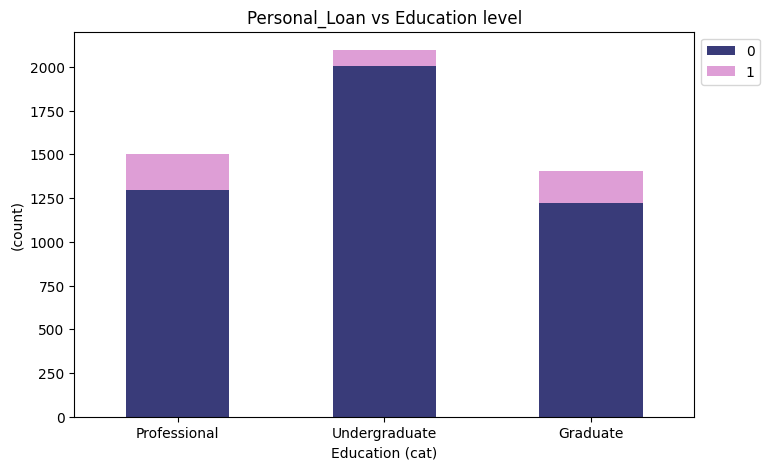

9.60 % of all customers have personal loans through the bank 

4.10 % of customers who have personal loans also have a 'Professional' education level 
3.64 % of customers who have personal loans also have a 'Graduate' education level 
1.86 % of customers who have personal loans also have an 'Undergraduate' education level 


In [ ]:
stacked_barplot(df_conversion, "Education", "Personal_Loan", colors='tab20b', xlabel='Education (cat)', ylabel='(count)', title='Personal_Loan vs Education level',
                x_order=['Professional', 'Undergraduate', 'Graduate'], )
plt.show()
pro_percent = (tab1.loc['Professional', 1]/5000)*100
grad_percent = (tab1.loc['Graduate', 1]/5000)*100
ugrad_percent = (tab1.loc['Undergraduate', 1]/5000)*100
ed_percent = ugrad_percent + grad_percent + pro_percent
fmt(ed_percent, ' % of all customers have personal loans through the bank', decimals=2)
print('')
fmt(pro_percent, ' % of customers who have personal loans also have a \'Professional\' education level', decimals=2)
fmt(grad_percent, ' % of customers who have personal loans also have a \'Graduate\' education level', decimals=2)
fmt(ugrad_percent, ' % of customers who have personal loans also have an \'Undergraduate\' education level', decimals=2)

In [ ]:
# Other statistics
pro_percent_ = (tab1.loc['Professional', 1]/tab1.loc['Professional', 'All'])*100
grad_percent_ = (tab1.loc['Graduate', 1]/tab1.loc['Graduate', 'All'])*100
ugrad_percent_ = (tab1.loc['Undergraduate', 1]/tab1.loc['Undergraduate', 'All'])*100
print('')
fmt(pro_percent_, ' % of customers with a \'Professional\' education level have personal loans through the bank', decimals=2)
fmt(ugrad_percent_, ' % of customers with an \'Undergraduate\' education level have personal loans through the bank', decimals=2)
fmt(grad_percent_, ' % of customers with a \'Graduate\' education level have personal loans through the bank', decimals=2)


13.66 % of customers with a 'Professional' education level have personal loans through the bank 
4.44 % of customers with an 'Undergraduate' education level have personal loans through the bank 
12.97 % of customers with a 'Graduate' education level have personal loans through the bank 


In [ ]:
#distribution_plot_wrt_target(df, "Age", "Personal_Loan")

Observed:
* Less than 10% of customers have personal loans through the bank
* Customers with undergraduate educations are underrepresented as loan holders when compared to other educaiton levels
* There is uncertainty as to what is meant specifically by the education level 'Professional'. Does this mean doctors and lawyers, or simple certification programs?

####**Personal_Loan vs. Family**

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


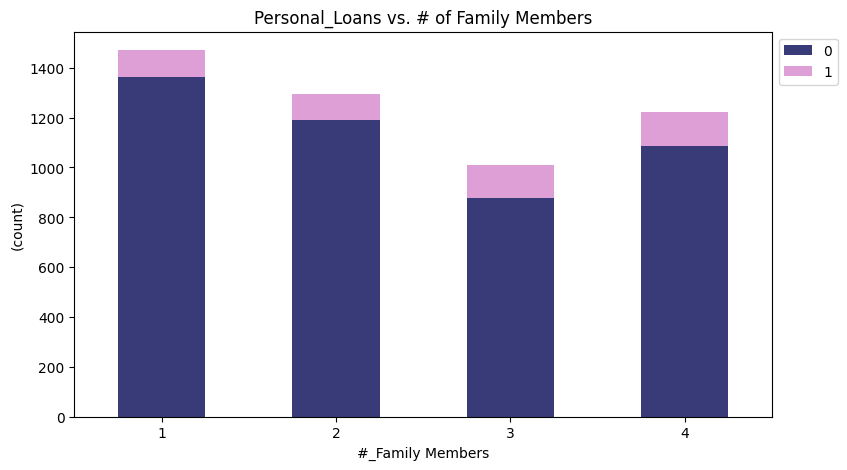


7.27 % of customers with '1' family member have personal loans through the bank 
8.18 % of customers with '2' family members have personal loans through the bank 
13.17 % of customers with '3' family members have personal loans through the bank 
10.97 % of customers with '4' family members have personal loans through the bank 


In [ ]:
stacked_barplot(df_conversion, "Family", "Personal_Loan", colors='tab20b', xlabel='#_Family Members', ylabel='(count)', x_order=[1,2,3,4],
                rotate_xlabel="horizontal", title="Personal_Loans vs. # of Family Members")
plt.show()
a_percent = (tab1.loc[1, 1]/tab1.loc[1, 'All'])*100
b_percent = (tab1.loc[2, 1]/tab1.loc[2, 'All'])*100
c_percent = (tab1.loc[3, 1]/tab1.loc[3, 'All'])*100
d_percent = (tab1.loc[4, 1]/tab1.loc[4, 'All'])*100
print('')
fmt(a_percent, ' % of customers with \'1\' family member have personal loans through the bank', decimals=2)
fmt(b_percent, ' % of customers with \'2\' family members have personal loans through the bank', decimals=2)
fmt(c_percent, ' % of customers with \'3\' family members have personal loans through the bank', decimals=2)
fmt(d_percent, ' % of customers with \'4\' family members have personal loans through the bank', decimals=2)

Observed:
* There's no clear trend with respect to these two variables

####**Personal_Loan vs. CD_Account**

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


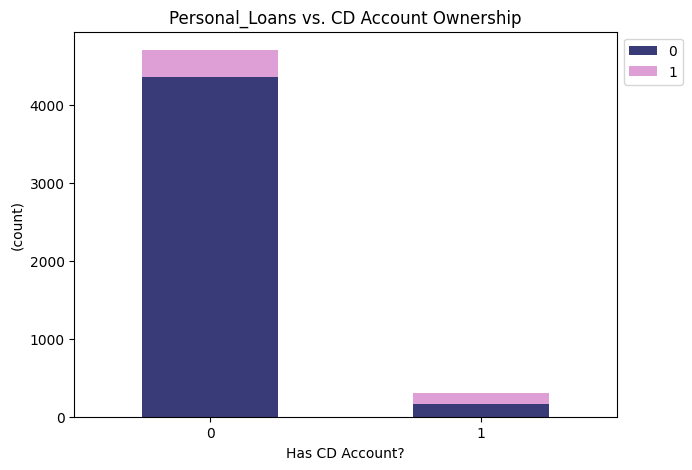


7.24 % of customers who do not have a certificate of deposit account have a personal loan through the bank 
46.36 % of customers who DO have a certificate of deposit account also have a personal loan through the bank 


In [ ]:
stacked_barplot(df_conversion, "CD_Account", "Personal_Loan", colors='tab20b', xlabel='Has CD Account?', ylabel='(count)',
                title='Personal_Loans vs. CD Account Ownership', rotate_xlabel="horizontal")
plt.show()
cd0_percent = (tab1.loc[0, 1]/tab1.loc[0, 'All'])*100
cd1_percent = (tab1.loc[1, 1]/tab1.loc[1, 'All'])*100
print('')
fmt(cd0_percent, ' % of customers who do not have a certificate of deposit account have a personal loan through the bank', decimals=2)
fmt(cd1_percent, ' % of customers who DO have a certificate of deposit account also have a personal loan through the bank', decimals=2)

Observed:
* A siginificant portion of customer who have checking acounts at the bank also have personal loans (~30%).
* Very few customers have personal loans when they also do not have a checking deposit account


####**Personal_Loan vs. Securities_Account**

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


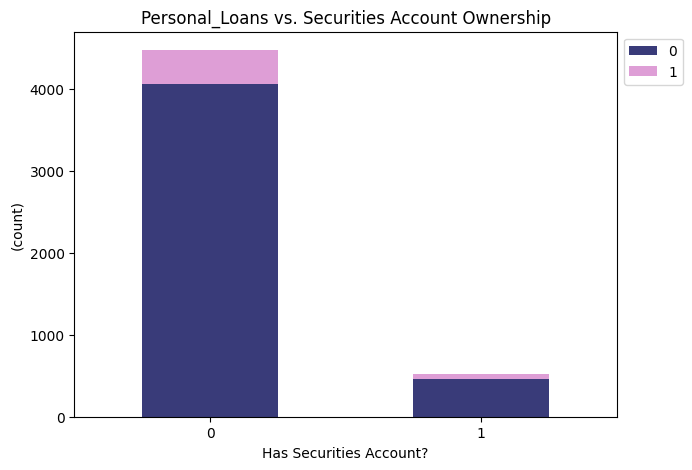


9.38 % of customers who do not have a securities deposit account have a personal loan through the bank 
11.49 % of customers who DO have a securities deposit account also have a personal loan through the bank 


In [ ]:
stacked_barplot(df_conversion, "Securities_Account", "Personal_Loan", colors='tab20b', xlabel='Has Securities Account?', ylabel='(count)',
                title='Personal_Loans vs. Securities Account Ownership', rotate_xlabel="horizontal")
plt.show()
sd0_percent = (tab1.loc[0, 1]/tab1.loc[0, 'All'])*100
sd1_percent = (tab1.loc[1, 1]/tab1.loc[1, 'All'])*100
print('')
fmt(sd0_percent, ' % of customers who do not have a securities deposit account have a personal loan through the bank', decimals=2)
fmt(sd1_percent, ' % of customers who DO have a securities deposit account also have a personal loan through the bank', decimals=2)

Observed:
* There doesn't appear to be a correlation here as the proportions are similar in either case

####**Personal_Loan vs. Online**

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


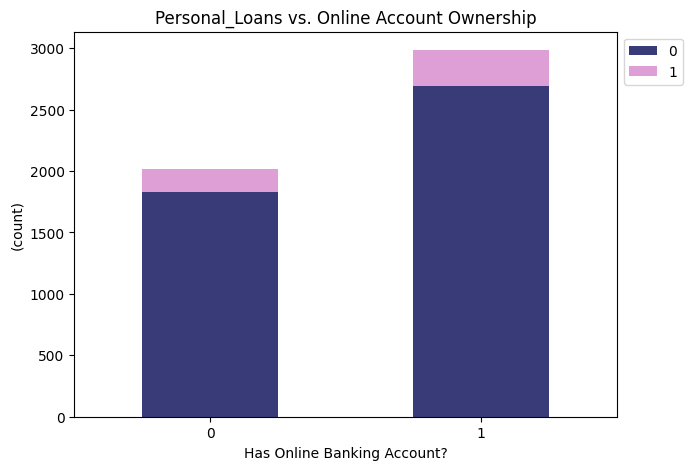


59.68 % of all the bank's customers have online banking accounts 

9.38 % of customers who do not have an online banking account have a personal loan through the bank 
9.75 % of customers who DO have an online banking account also have a personal loan through the bank 


In [ ]:
stacked_barplot(df_conversion, "Online", "Personal_Loan", colors='tab20b', xlabel='Has Online Banking Account?', ylabel='(count)',
                title='Personal_Loans vs. Online Account Ownership', x_order=[0,1], rotate_xlabel="horizontal")
plt.show()
ol0_percent = (tab1.loc[0, 1]/tab1.loc[0, 'All'])*100
ol1_percent = (tab1.loc[1, 1]/tab1.loc[1, 'All'])*100
print('')
fmt((df_conversion['Online'].sum()/5000)*100, ' % of all the bank\'s customers have online banking accounts', decimals=2)
print('')
fmt(ol0_percent, ' % of customers who do not have an online banking account have a personal loan through the bank', decimals=2)
fmt(ol1_percent, ' % of customers who DO have an online banking account also have a personal loan through the bank', decimals=2)

Observed:
* It appears that ownership of an online banking account does not have any relationship with personal loans (proportions in either case are the same)


####**Personal_Loan vs. CreditCard**

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


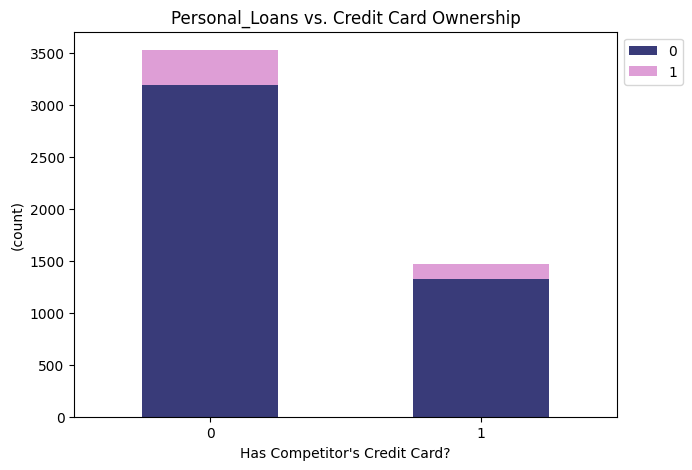


29.40 % of all the bank's customers have a credit card issued by another bank 

9.55 % of customers who do not have a competitor's credit card have a personal loan through the bank 
9.73 % of customers who DO have a competitor's credit card also have a personal loan through the bank 


In [ ]:
stacked_barplot(df_conversion, "CreditCard", "Personal_Loan", colors='tab20b', xlabel='Has Competitor\'s Credit Card?', ylabel='(count)',
                title='Personal_Loans vs. Credit Card Ownership', rotate_xlabel="horizontal")
plt.show()
cc0_percent = (tab1.loc[0, 1]/tab1.loc[0, 'All'])*100
cc1_percent = (tab1.loc[1, 1]/tab1.loc[1, 'All'])*100
print('')
fmt((df_conversion['CreditCard'].sum()/5000)*100, ' % of all the bank\'s customers have a credit card issued by another bank', decimals=2)
print('')
fmt(cc0_percent, ' % of customers who do not have a competitor\'s credit card have a personal loan through the bank', decimals=2)
fmt(cc1_percent, ' % of customers who DO have a competitor\'s credit card also have a personal loan through the bank', decimals=2)

Observed:
* As with 'Online' account ownership, the proportion of customers who have personal loans does not seem to be affected by credit card ownership


####**Personal_Loan vs. ZIPCode**

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


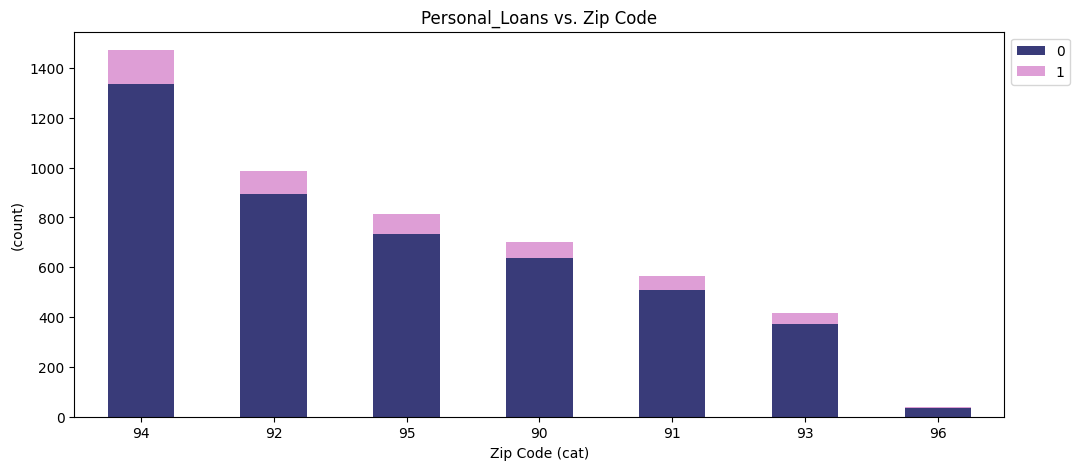


9.53 % of customers who live in area code '90' have a personal loan through the bank 
9.73 % of customers who live in area code '91' have a personal loan through the bank 
9.51 % of customers who live in area code '92' have a personal loan through the bank 
10.31 % of customers who live in area code '93' have a personal loan through the bank 
9.38 % of customers who live in area code '94' have a personal loan through the bank 
9.82 % of customers who live in area code '95' have a personal loan through the bank 
7.50 % of customers who live in area code '96' have a personal loan through the bank 


In [ ]:
stacked_barplot(df_conversion, "ZIPCode", "Personal_Loan", colors='tab20b', xlabel='Zip Code (cat)', ylabel='(count)',
                title='Personal_Loans vs. Zip Code', rotate_xlabel="horizontal")
plt.show()
zc90_percent = (tab1.loc[90, 1]/tab1.loc[90, 'All'])*100
zc91_percent = (tab1.loc[91, 1]/tab1.loc[91, 'All'])*100
zc92_percent = (tab1.loc[92, 1]/tab1.loc[92, 'All'])*100
zc93_percent = (tab1.loc[93, 1]/tab1.loc[93, 'All'])*100
zc94_percent = (tab1.loc[94, 1]/tab1.loc[94, 'All'])*100
zc95_percent = (tab1.loc[95, 1]/tab1.loc[95, 'All'])*100
zc96_percent = (tab1.loc[96, 1]/tab1.loc[96, 'All'])*100
print('')
fmt(zc90_percent, ' % of customers who live in area code \'90\' have a personal loan through the bank', decimals=2)
fmt(zc91_percent, ' % of customers who live in area code \'91\' have a personal loan through the bank', decimals=2)
fmt(zc92_percent, ' % of customers who live in area code \'92\' have a personal loan through the bank', decimals=2)
fmt(zc93_percent, ' % of customers who live in area code \'93\' have a personal loan through the bank', decimals=2)
fmt(zc94_percent, ' % of customers who live in area code \'94\' have a personal loan through the bank', decimals=2)
fmt(zc95_percent, ' % of customers who live in area code \'95\' have a personal loan through the bank', decimals=2)
fmt(zc96_percent, ' % of customers who live in area code \'96\' have a personal loan through the bank', decimals=2)

Observed:
* It does not appear that there is a correlation between zip code and personal loan ownership because %ownership across all zip codes is nearly the same.

####**Personal_Loan vs. Age**

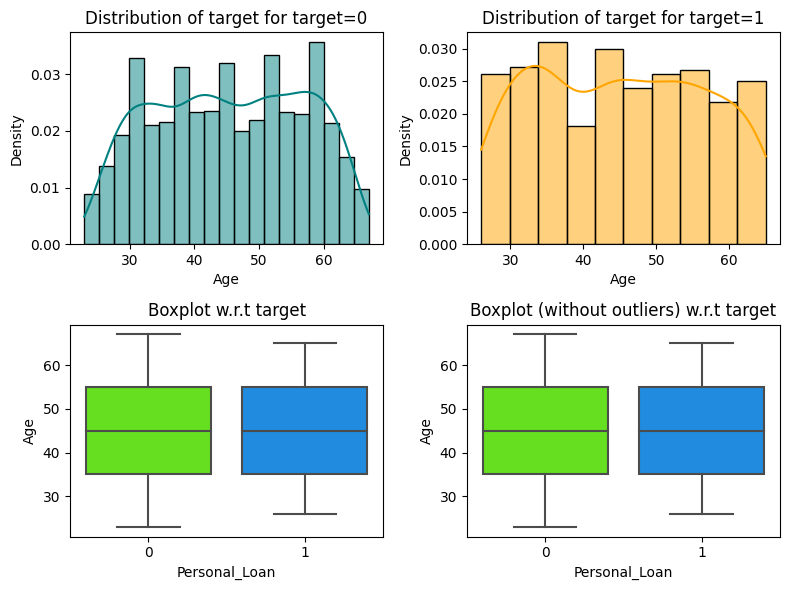

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")
plt.show()

Observed:
* The distribution and median of customers who have (and have not) purchased personal loans is nearly the same. There does not seem to be much correlation between age and personal loans.


####**Personal_Loan vs. Experience**

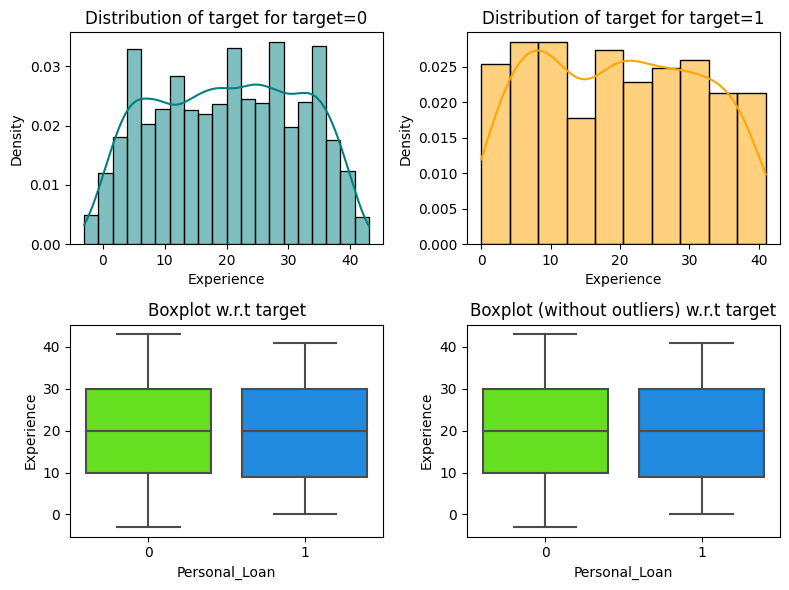

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")
plt.show()

Observed:
* As with Age (above), the median and distributions for 'Experience' are very similar among customers who both have & do not have personal loans.


####**Personal_Loan vs. Income**

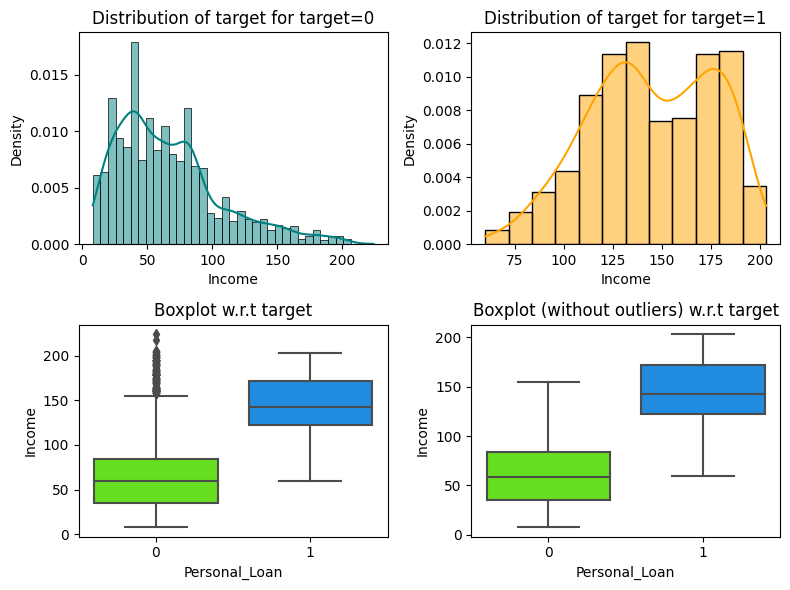

In [ ]:
# @title
distribution_plot_wrt_target(data, "Income", "Personal_Loan")
plt.show()

Observed:
* This plot shows that customers with higher incomes are more likely to purchase personal loans. Additionally, the two customer groups have skewness results which are opposite of each other.


####**Personal_Loan vs. CCAvg**

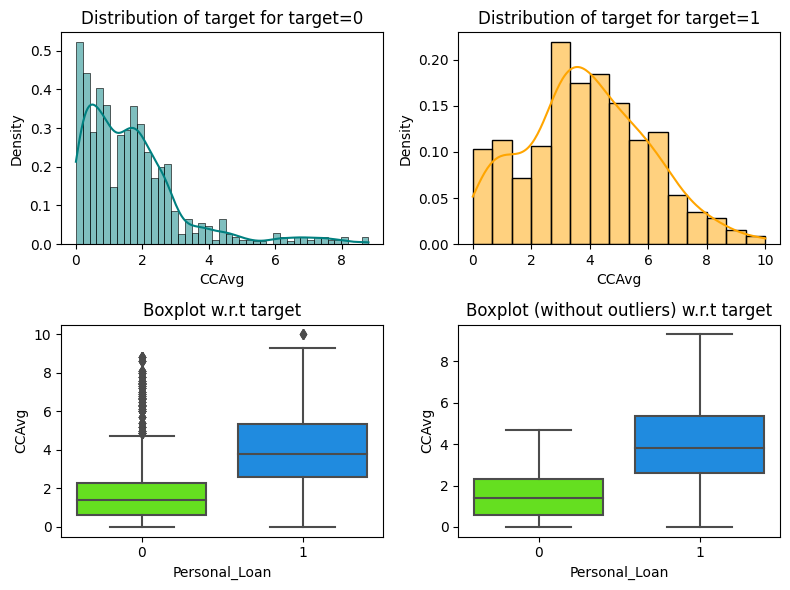

In [ ]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")
plt.show()

Observed:
* 75% of the bank's customers have more than ~ $ 2,500 in credit card debt.
* The many outliers among those those customers who do not have personal loans indicate that credit card debt/balance is probably not the only factor that best indicates a willingness to purchase a personal loan.

##**5.0 Data Preprocessing (Part II)**

###**5.1 Outlier Detection**

In [ ]:
Q1 = df.quantile(.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = df.quantile(.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

((data.select_dtypes(include=["float64", "int64"]) < lower)
    |(data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age                   0.00
CCAvg                 6.48
CD_Account            0.00
CreditCard            0.00
Education             0.00
Experience            0.00
Family                0.00
ID                    0.00
Income                1.92
Mortgage              5.82
Online                0.00
Personal_Loan         9.60
Securities_Account    0.00
ZIPCode               0.00
dtype: float64

Observed:
* CCAvg, Income, and Mortgage have outliers present in the dataset.
* We won't treat these


###**5.2 Adding new 'Has_Mortgage' column**

In [ ]:
'''
This section was iniially used
to try different features for the
models.
'''
# Add a new binary column 'has_mortgage' to tell when a customer has a mortgage
#df['has_mortgage'] = (df['Mortgage'] > 0).astype(int)
#df['has_mortgage'] = df['has_mortgage'].astype('category')
#df.dtypes;

'\nThis section was iniially used\nto try different features for the\nmodels.\n'

###**5.3 Splitting Data & Creating Training Sets**

In [ ]:
# Separate independent and dependent variable
X = df.drop(["Personal_Loan", "Experience"], axis=1)
y = df["Personal_Loan"]

In [ ]:
# Get dummies for ZIPCode and Education
X = pd.get_dummies(X, columns=['ZIPCode', 'Education'], drop_first=True)

# Split data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)   # Get the shape of train data
print("Shape of test set : ", X_test.shape)        # Get the shape of test data
print('')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))        # Get the value counts of y_train data
print('')
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))         # Get the value counts of y_test data

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


In [ ]:
'''
Imbalanced classes
'''

# Calculate weights for each class
w_0 = .4
w_1 = .6

# Create a dictionary with the class as key and the weight as value
class_weights = {0: w_0, 1: w_1}

##**6.0 Model Building**

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Predicting a customer will take the personal loan when, in reality, they will not - Loss of resources
2. Predicting a customer will not take the personal loan when, in reality, they would have - Loss of opportunity

**Which case is more important?**
* Losing a potential customer by predicting that the customer will not be taking the personal loan but in reality the customer was going to take the personal loan.

**How to reduce this loss i.e need to reduce False Negatives?**

* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives.

####**Define Functions**

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    '''
    To plot the confusion_matrix with percentages and labels.

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    # Create an array with the labels.
    labels_with_percent = np.asarray(
        [
            [
                f"{item}\n{item/cm.flatten().sum():.2%}\n{label}"
                for item, label in zip(row, labels_row)
            ]
            for row, labels_row in zip(cm, [["TN", "FP"], ["FN", "TP"]])
        ]
    )

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels_with_percent, fmt="", cmap='Blues')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

In [ ]:
def plot_tree(model_name):
  '''
  To plot the decision tree

  model_name: name of model
  '''
  plt.figure(figsize=(9, 9))
  out = tree.plot_tree(
      model_name,
      feature_names=feature_names,
      filled=True,
      fontsize=9,
      node_ids=False,
      class_names=None,
  )
  # below code will add arrows to the decision tree split if they are missing
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor("black")
          arrow.set_linewidth(1)
  plt.show()

####**Build Decision Tree Model**

In [ ]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

####**Check Performance (Train)**

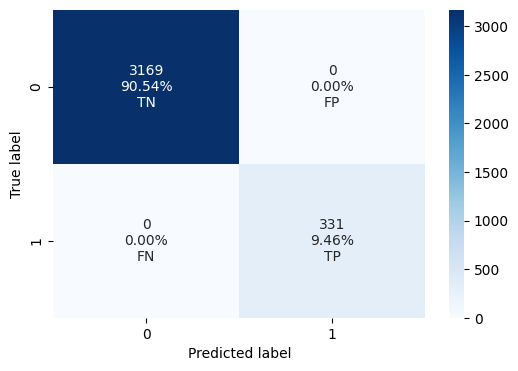

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Check the model's scores
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**These scores are normal and represent an overfitted model. We will prune the tree to get a better model.**

####**Visualize the Tree**

In [ ]:
# Get feature names for the decision tree
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


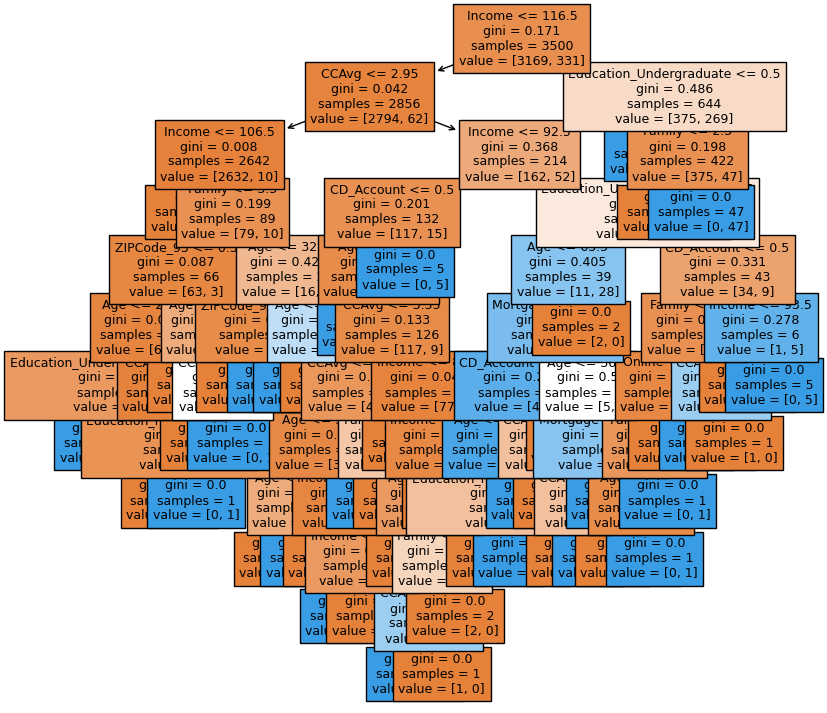

In [ ]:
# Plot the decision tree
plot_tree(model)

*As expected, this is a very complicated model which is overfitting the data*

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

####**Feature Importances**

In [ ]:
# Computing the Gini Importance for each feature
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


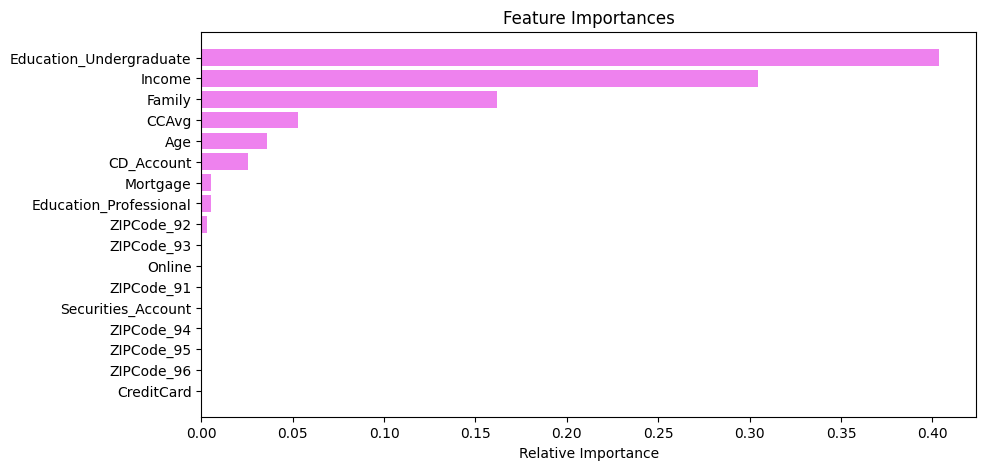

In [ ]:
# Plot the feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature in this model is 'Education_Undergraduate'

####**Check Model Performance (Test)**

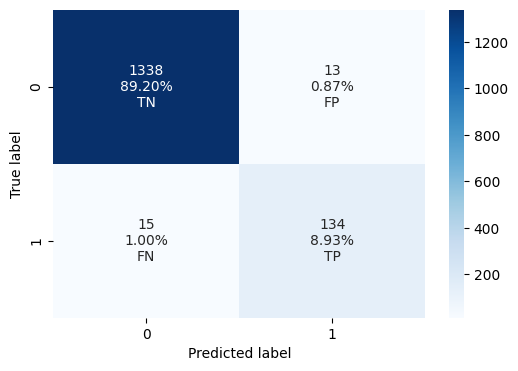

In [ ]:
# Create the confusion matrix for the test data
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
#Check the model's performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


##**7.0 Model Performance Improvement**

*The deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting.*

* *Model_1: Limiting the max_depth hyper parameter.*
* *Model_2: GridSearchCV*
* *Model_3: Cost-Complexity*
* *Model_4: Post_Pruning*

###**7.1 Decision Tree Model Pruning**

####**Model_1: Limiting 'max_depth'**

Let's try limiting the tree to a depth of three.

#####Create Decision Tree Model

In [ ]:
# Generate model with max_depth = 3
model_1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=1)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

#####Check Performance on Train data

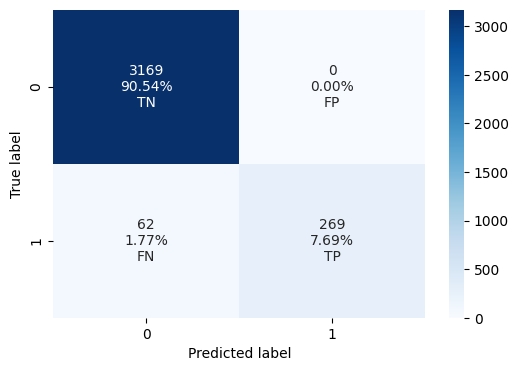

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(model_1, X_train, y_train)

In [ ]:
# Calculate performance scores
decision_tree_model_train = model_performance_classification_sklearn(model_1, X_train, y_train)
decision_tree_model_train

,Accuracy,Recall,Precision,F1
0,0.982286,0.812689,1.0,0.896667


#####Visualize the Decision Tree

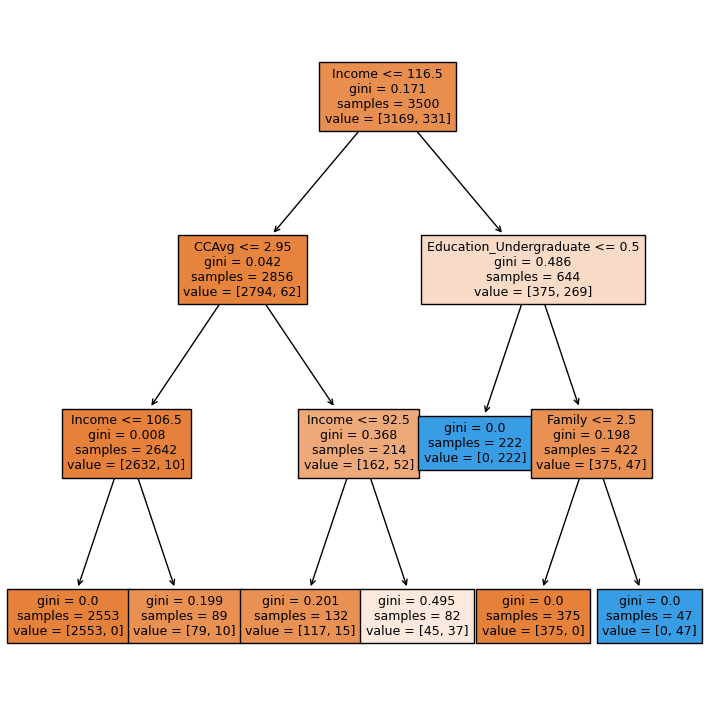

In [ ]:
# Plot the decision tree
plot_tree(model_1)

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model_1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- weights: [45.00, 37.00] class: 0
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1



In [ ]:
# Compute the Gini importance
print (pd.DataFrame(model_1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                              Imp
Education_Undergraduate  0.446593
Income                   0.346997
Family                   0.162372
CCAvg                    0.044038
ZIPCode_92               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
Age                      0.000000
ZIPCode_91               0.000000
Online                   0.000000
CD_Account               0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CreditCard               0.000000


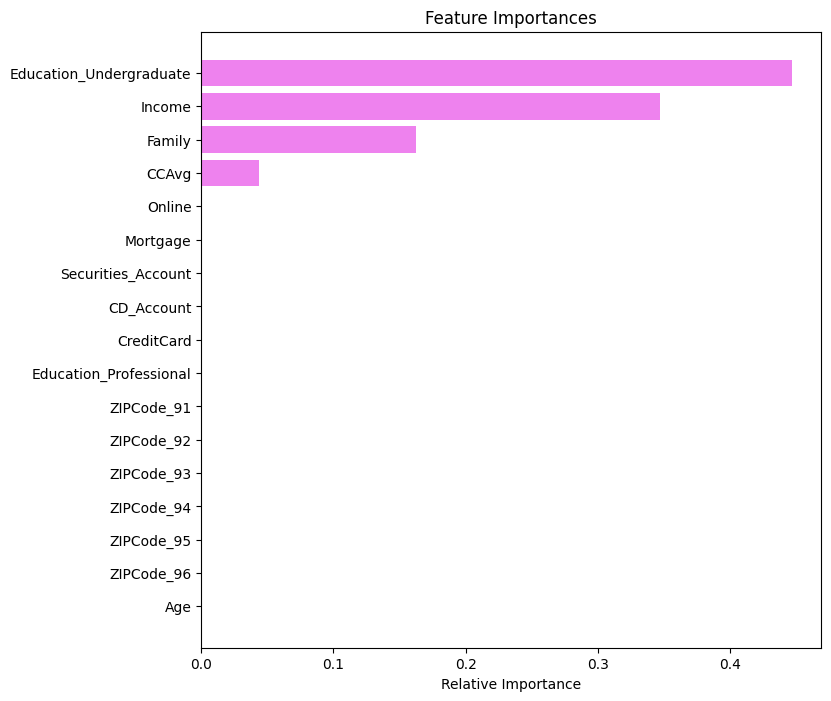

In [ ]:
importances = model_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#####Check Performance on Test Data

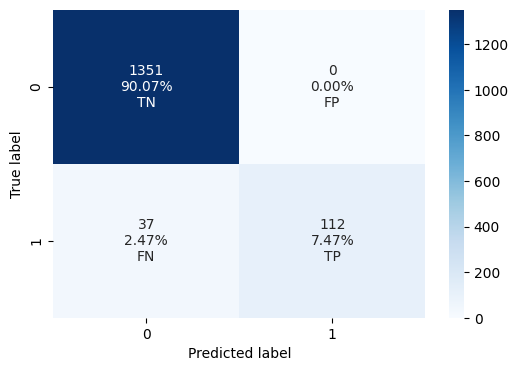

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(model_1, X_test, y_test)

In [ ]:
# Complete the code to get the model formance on test data
decision_tree_model_test = model_performance_classification_sklearn(model_1, X_test, y_test)
decision_tree_model_test

,Accuracy,Recall,Precision,F1
0,0.975333,0.751678,1.0,0.858238


####**Model_2: GridSearchCV**
*This model will use the GridSearchCV method to tune hyperparameters. Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It conducts an exhaustive search that is performed on a the specific parameter values of a model. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.*



#####Create Decision Tree Model

In [ ]:
# Choose the type of classifier.
estimator_1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator_1, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator_1 = grid_obj.best_estimator_

# Fit model on train data
estimator_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

#####Check Performance on Train Data

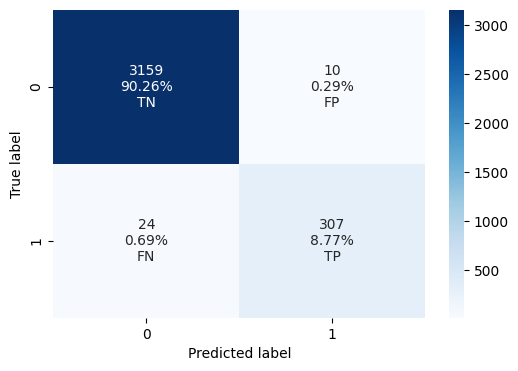

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(estimator_1, X_train, y_train)

In [ ]:
# Calculate performance scores
decision_tree_estimator_train = model_performance_classification_sklearn(estimator_1, X_train, y_train)
decision_tree_estimator_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


#####Visualize the Decision Tree

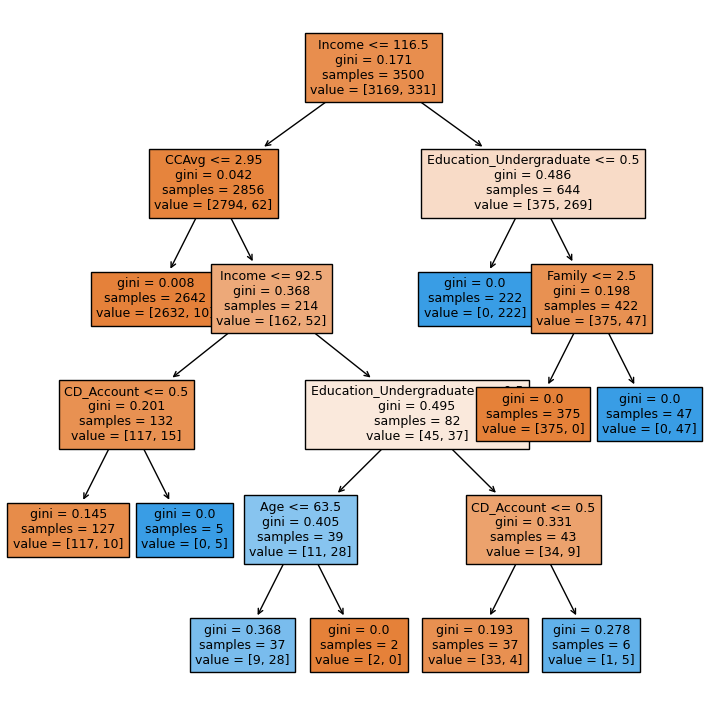

In [ ]:
# Visualizing the Decision Tree
plot_tree(estimator_1)

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

In [ ]:
# Calculate the Gini Importance Scores
print(
    pd.DataFrame(
        estimator_1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


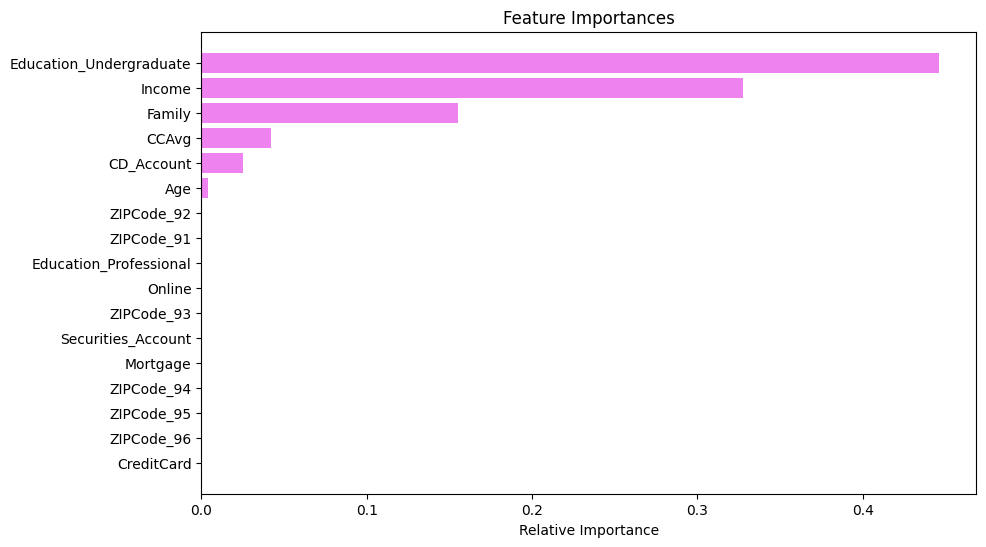

In [ ]:
# Plot the feature importances
importances = estimator_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#####Check Performance on Test Data

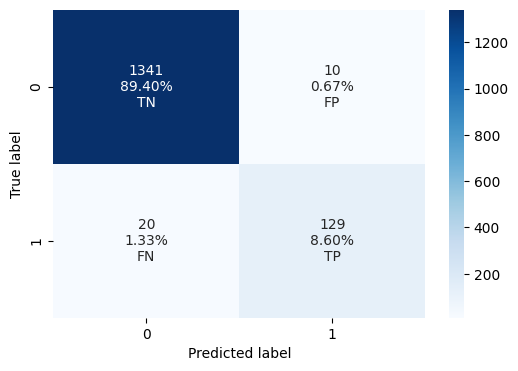

In [ ]:
# Create the confusion maxtrix
confusion_matrix_sklearn(estimator_1, X_test, y_test)

In [ ]:
# Complete the code to get the model performance on test data
decision_tree_estimator_test = model_performance_classification_sklearn(estimator_1, X_test, y_test)
decision_tree_estimator_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


####**Model_3: Cost-Complexity Pruning**

#####Create the Decision Tree Model

In [ ]:
# Create decision tree model
clf = DecisionTreeClassifier(random_state=1)
# Find pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
# Extract Alphas & Impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# Display alpha and impurity values
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


#####Visualize the Alphas an Impurities

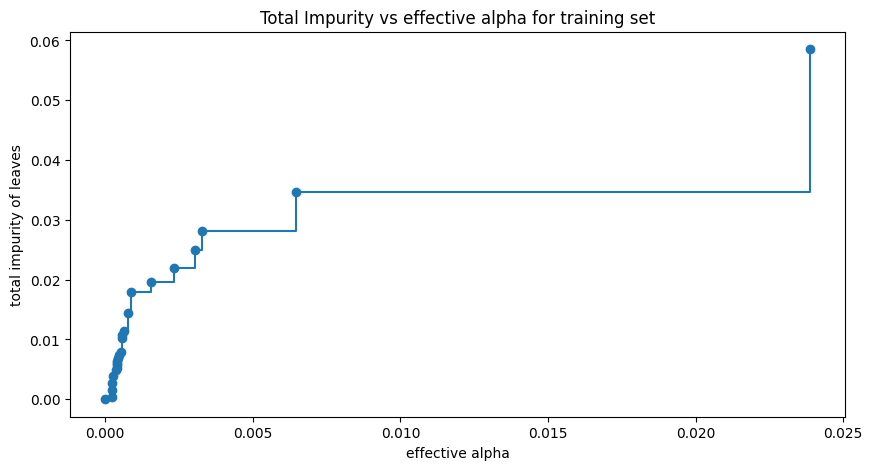

In [ ]:
# Visualize how the total impurity of leaves changes with different Alpha expiraments
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "The number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

The number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


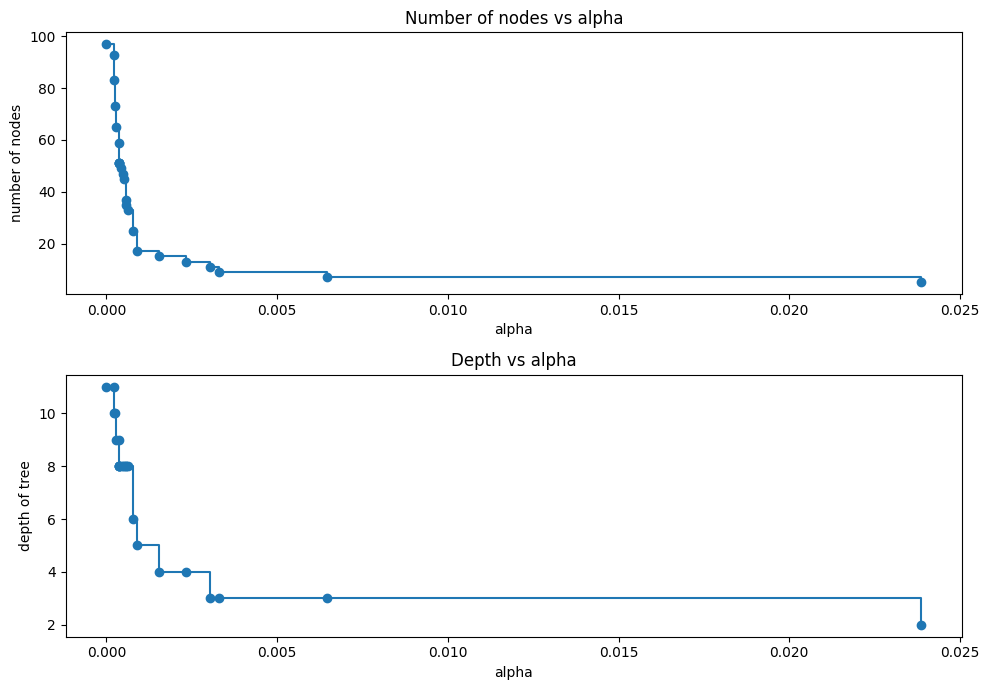

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#####Recall vs. Alpha for Train and Test data

In [ ]:
# Calculate the recall score for the cost-complexity model
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

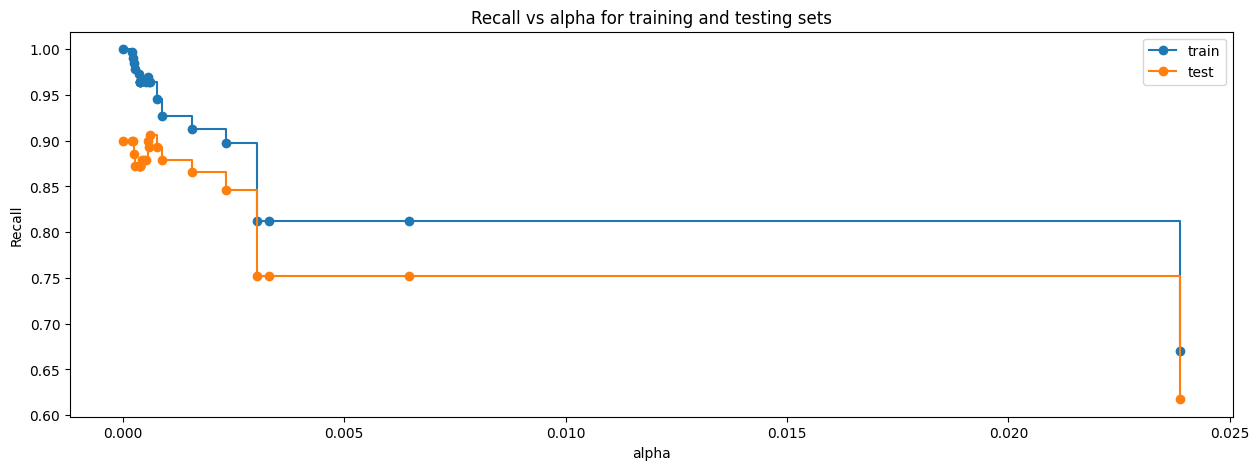

In [ ]:
# Visualize the Recall score on training and test sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
'''
Apply the best model (highest Recall
score)
'''
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


#####Check Performance on Train data

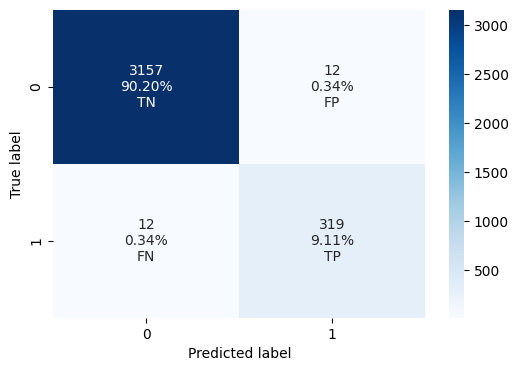

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_bestmodel_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_bestmodel_train

,Accuracy,Recall,Precision,F1
0,0.993143,0.963746,0.963746,0.963746


#####Visualize the Decision Tree

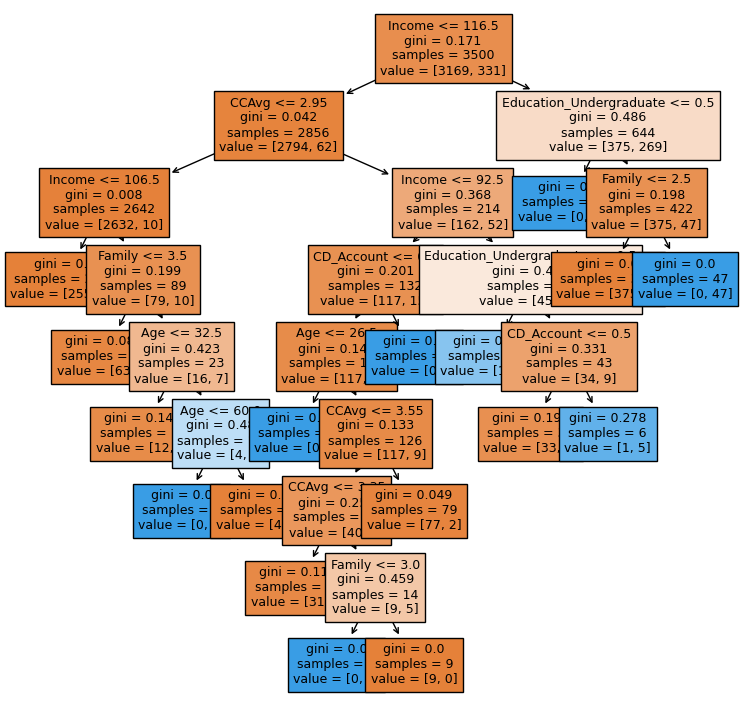

In [ ]:
plot_tree(best_model)

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.35
|   

In [ ]:
# Calculate the Gini Importance Scores
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.429489
Income                   0.319013
Family                   0.164852
CCAvg                    0.045185
CD_Account               0.024298
Age                      0.017163
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


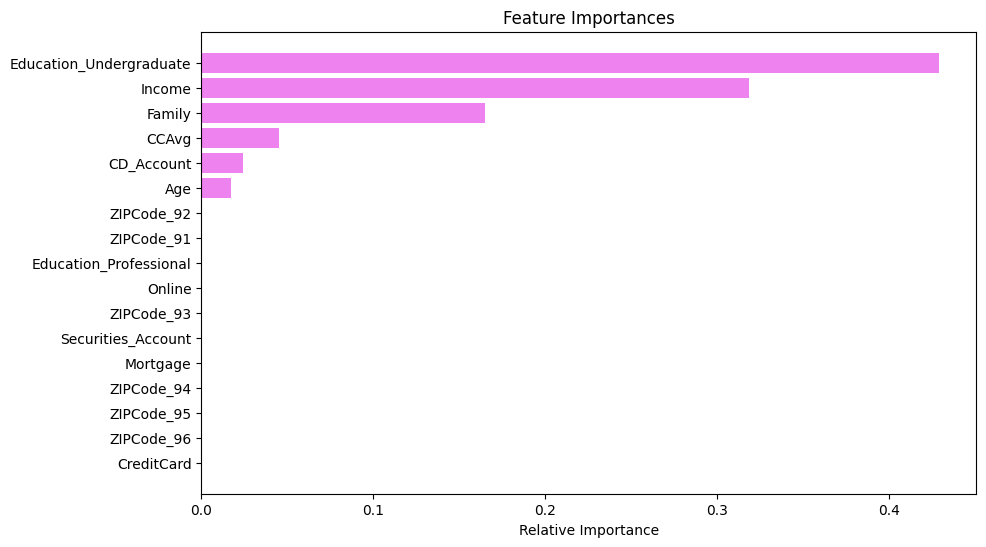

In [ ]:
# Plot the feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#####Check Performance on Test Data

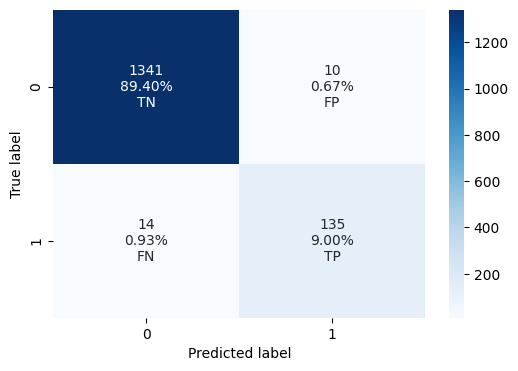

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(best_model, X_test, y_test)

The 'Train' data should include 1,500 predictions (because we split the data `[70:30]` or `[5000:1500]`. What this confusion matrix is telling us is:

* Our model predicted that 9% of our target variable *in the 'Train' data set* would purchase a personal loan. This is on par with expectations because ~9.6% of our entire sample ( `X_train` + `X_test`) were flagged with true labels.
* In 14 instances, our model incorrectly predicted that a customer would not accept a personal loan offer when they *would* have. However, this represents less than 1% of our data.
* In 10 instances (only 0.7%), the model incorrectly assumed that a customer was likely to accept a personal loan when they, in fact, did not.

In [ ]:
decision_tree_bestmodel_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_bestmodel_test

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


####**Model_4: Post Pruning**

#####Create the Decision Tree Model

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.056364969335601575,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#####Check Performance on Train Data

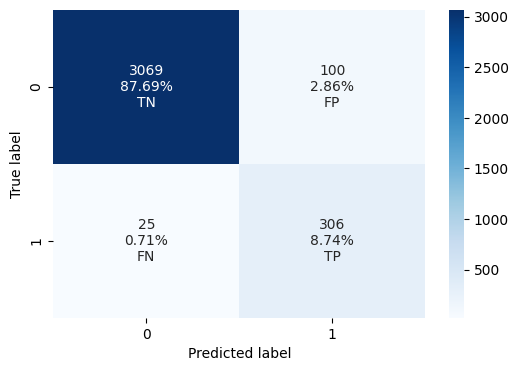

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [ ]:
decision_tree_estimator_2_train = model_performance_classification_sklearn(estimator_2, X_train, y_train)
decision_tree_estimator_2_train

,Accuracy,Recall,Precision,F1
0,0.964286,0.924471,0.753695,0.830393


#####Visualize the Decision Tree

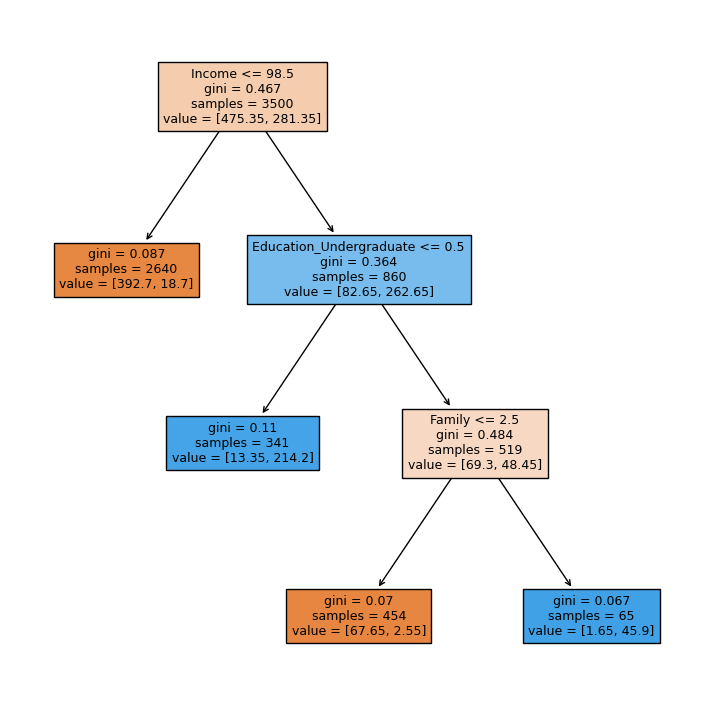

In [ ]:
plot_tree(estimator_2)

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



In [ ]:
# Calculate the Gini Importance Scores
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.674921
Family                   0.171953
Education_Undergraduate  0.153126
ZIPCode_92               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
Age                      0.000000
ZIPCode_91               0.000000
Online                   0.000000
CD_Account               0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CCAvg                    0.000000
CreditCard               0.000000


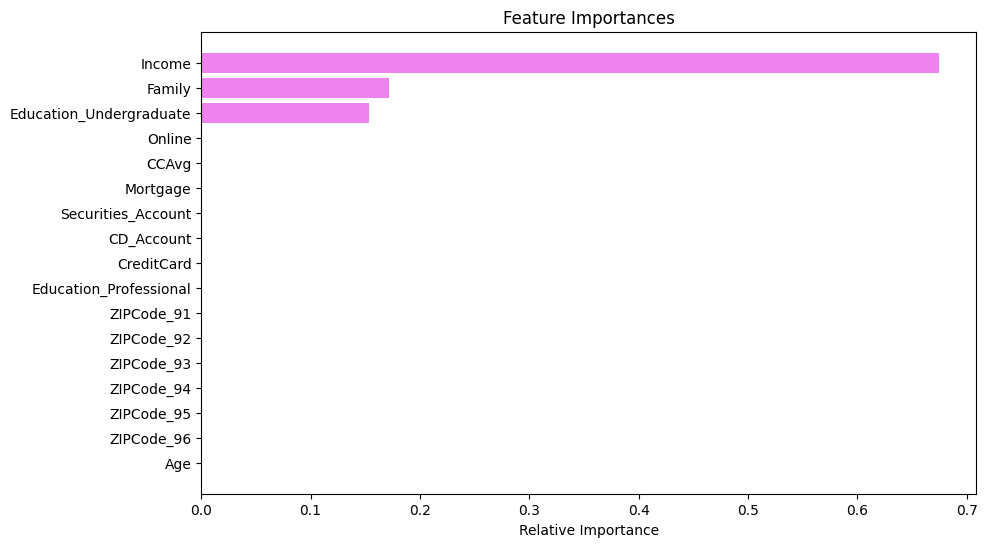

In [ ]:
# Plot the feature importances
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#####Check Performance on Test Data

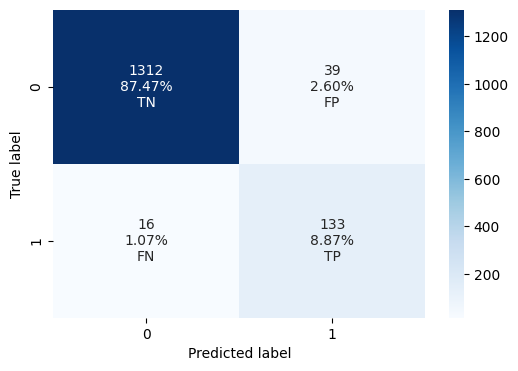

In [ ]:
# Create confusion matrix
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [ ]:
decision_tree_estimator_2_test = model_performance_classification_sklearn(estimator_2, X_test, y_test)
decision_tree_estimator_2_test

,Accuracy,Recall,Precision,F1
0,0.963333,0.892617,0.773256,0.82866


##**8.0 Model Comparison and Final Model Selection**

In [ ]:
# Print Training Performance Comparison
models_train_comp_df = pd.concat(
                      [decision_tree_model_train.T,
                       decision_tree_estimator_train.T,
                       decision_tree_bestmodel_train.T,
                       decision_tree_estimator_2_train.T],
                      axis=1,)
models_train_comp_df.columns = ['Model 1: Limiting max_depth',
                                'Model 2: GridSearchCV (Tuning)',
                                'Model 3: Cost-Complexity (Pre-Pruning)',
                                'Model 4: Post Pruning']
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Model 1: Limiting max_depth,Model 2: GridSearchCV (Tuning),Model 3: Cost-Complexity (Pre-Pruning),Model 4: Post Pruning
Accuracy,0.982286,0.990286,0.993143,0.964286
Recall,0.812689,0.927492,0.963746,0.924471
Precision,1.000000,0.968454,0.963746,0.753695
F1,0.896667,0.947531,0.963746,0.830393


In [ ]:
# Print Testing Performance Comparison
models_test_comp_df = pd.concat(
                      [decision_tree_model_test.T,
                       decision_tree_estimator_test.T,
                       decision_tree_bestmodel_test.T,
                       decision_tree_estimator_2_test.T],
                      axis=1,)
models_test_comp_df.columns = ['Model 1: Limiting max_depth',
                                'Model 2: GridSearchCV (Tuning)',
                                'Model 3: Cost-Complexity (Pre-Pruning)',
                                'Model 4: Post Pruning']
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Model 1: Limiting max_depth,Model 2: GridSearchCV (Tuning),Model 3: Cost-Complexity (Pre-Pruning),Model 4: Post Pruning
Accuracy,0.975333,0.980000,0.984000,0.963333
Recall,0.751678,0.865772,0.906040,0.892617
Precision,1.000000,0.928058,0.931034,0.773256
F1,0.858238,0.895833,0.918367,0.828660


##**9.0 Applying the Predictions**

In [ ]:
# Creating a copy of the original feature DataFrame
df_with_predictions = X.copy()

predictions = estimator_1.predict(X)
prob = estimator_1.predict_proba(X)[:,0]

# Adding new columns
df_with_predictions['Predictions'] = predictions
df_with_predictions['Prob'] = prob
df_with_predictions['Personal_Loan'] = y
df_with_predictions_clean = df_with_predictions[['Personal_Loan', 'Predictions', 'Prob']]

# Convert 'Predictions' and 'Personal_Loan' columns to int type
df_with_predictions['Predictions'] = df_with_predictions['Predictions'].astype(int)
df_with_predictions['Prob'] = df_with_predictions['Prob'].astype(float)
df_with_predictions['Personal_Loan'] = df_with_predictions['Personal_Loan'].astype(int)

df_with_predictions_clean.head(10)



,Personal_Loan,Predictions,Prob
0,0,0,0.996215
1,0,0,0.996215
2,0,0,0.996215
3,0,0,0.996215
4,0,0,0.996215
5,0,0,0.996215
6,0,0,0.996215
7,0,0,0.996215
8,0,0,0.996215
9,1,1,0.000000


In [ ]:
def compare_predictions(df):
    correct = 0  # to store the count of correct predictions
    wrong = 0  # to store the count of wrong predictions

    # Iterate over DataFrame rows and compare values in 'Predictions' and 'Personal_Loan' columns
    for index, row in df.iterrows():
        if row['Predictions'] == row['Personal_Loan']:
            correct += 1
        else:
            wrong += 1

    # Calculate the % difference between 'correct' and 'wrong'
    total = correct + wrong
    correct_percentage = (correct / total) * 100
    wrong_percentage = (wrong / total) * 100
    difference_percentage = abs(correct_percentage - wrong_percentage)

    # Print the results
    fmt('Correct Predictions: ', correct, '  (', correct_percentage, ' %)', decimals=2)
    fmt('Wrong Predictions: ', wrong, '       ( ', wrong_percentage, ' %)', decimals=2)

In [ ]:
# Call the function with the df_with_predictions DataFrame
compare_predictions(df_with_predictions)

Correct Predictions: 4,936  (98.72 %) 
Wrong Predictions: 64       ( 1.28 %) 


___

##**10.0 Actionable Insights and Business Recommendations**


####**Model Summary:**
 Since we want to limit the chances of wrongly predicting that a client will *not* purchase a loan *(False Negatives)*, the best model will be the one with the highest `Recall` score. The `Recall` score is specifically chosen as the key evaluation metric because it represents the fraction of opportunities correctly identified.
 </br>
 </br>

The third model, **Model 3: Cost-Complexity**, performed with the highest recall scores among train and test datasets.

This decision-tree model was chosen as the predictive model for determining which customers will 'purchase' personal loans from the bank.


####**Model Performance:**
</br>
Recall Score Results:
</br>
</br>

|                 |Recall (Train)   |Recall (Test)    |
|-----------------|-----------------|-----------------|
|Model 1          |    0.812689	    |   0.751678      |
|Model 2          |    0.927492     |   0.865772      |
|Model 3          |    0.963746     |   0.906040      |
|Model 4          |    0.924471     |   0.892617      |

Once chosen, the model was applied to the entire dataset. A prediction was made for each row and stored in a column named `Predictions`. Next, a comparrison was made between the predicted value and the true value (the given dependant variable value).

The model performed extremely well against the complete dataset and predicted the correct resu;t with 99.44% accuracy across all 5,000 rows of data.

####**Feature Importance:**

Once trasformed, the `Train` and `Test` data sets each contained 17 features. These independant variables were used to train the model. During this process, steps to taken to measure the importance (weights) of each feature within the model. This efforts seeks to ask "Which features have the most affect on the predictive model?".

The Model 3: Cost-Complexity Model considered only the following features:

|Feature Name             |Weight   |       
|-------------------------|---------|
|Education_Undergraduate  |0.429489 |
|Income                   |0.319013 |
|Family                   |0.164852 |
|CCAvg                    |0.045185 |
|CD_Account               |0.024298 |
|Age                      |0.017163 |

Figure 10.1 visualizes the feature importances.

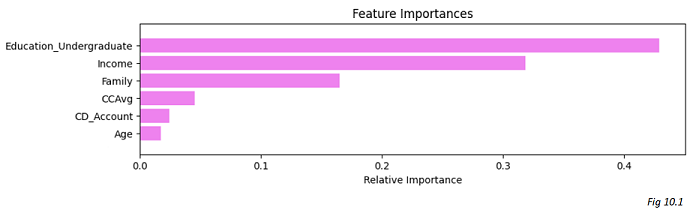

**Sample Insights from the Decision Tree Model:**

1. Higher Income Influences Loan Acceptance:
  * If `Income > 116.50` and `Education_Undergraduate ≤ 0.50`, the class is 1 (indicating a loan acceptance), with 222 instances.
  * If `Income > 116.50`, `Education_Undergraduate > 0.50`, and `Family > 2.50`, the class is 1 with 47 instances.

2. Lower Income but Higher Spending Indicates Likelihood of Acceptance:
  * For lower incomes (≤ 116.50) but with a `CCAvg > 2.95` and `Income > 92.50`, there are conditions where the class is 1, indicating acceptance of the loan.

3. Education Level Matters:
  * People who are not undergraduates (`Education_Undergraduate ≤ 0.50`) seem more likely to accept a loan under certain conditions.

####**Actions/Recommendations**

In the given data set, there were `480` Personal Loans given. Since the Train dataset was split (70%), we would expect to see about (480 x 0.70) = `336` instances where the model, if 100% accurate, predicts a customer will have a personal loan. This number depends on the split.

Our model predicted a total of `313` instances, which represents  ~65% of the data occurances and is in line with expectations.

Therefore, *our marketing efforts should focus on the feature values that produced the 313 instances where the presence of a personal loan was predicted*.

The bank should focus its marketing efforts on:

* (222 Instances) - Higher income customers (> \$116,500) who have either professional or graduate educations.
* (47 Instances) - Higher income customers (> \$116,500) who have a bechelor's education and at least 3 family members
* (28 Instances) - Higher income customers (< \$92,500) who spend more than $2,950 per month on credit cards
* Other feature combinations are relevant across the business but not detailed here...


